# I. PREFACE

## Identity

Nama : Dicky Gabriel

Batch : SBY-002

Data : [Fligh Satification Dataset ](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

## Goals to be Achieved

We will do analyze and visualize satisfication of airline passengers also make model that could predict if someone will love their flight experience or not 

| Column | Description |
| --- | --- |
| `Gender` | Gender of the passengers (Female, Male) |
| `Customer Type` | The customer type (Loyal customer, disloyal customer) |
| `Age` | The actual age of the passengers |
| `Type of Travel` | Purpose of the flight of the passengers (Personal Travel, Business Travel)|
| `Class` | Travel class in the plane of the passengers (Business, Eco, Eco Plus)|
| `Flight distance` | The flight distance of this journey |
| `Inflight wifi service` |Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| `Departure/Arrival time convenient` | Satisfaction level of Departure/Arrival time convenient |
| `Ease of Online booking` | Satisfaction level of online booking |
| `Gate location` | Satisfaction level of Gate location |
| `Food and drink` | Satisfaction level of Food and drink |
| `Online boarding` | Satisfaction level of online boarding |
| `Seat comfort` | Satisfaction level of Seat comfort |
| `Inflight entertainment` |Satisfaction level of inflight entertainment |
| `On-board service` | Satisfaction level of On-board service |
| `Leg room service` | Satisfaction level of Leg room service |
| `Baggage handling` | Satisfaction level of baggage handling |
| `Check-in service` | Satisfaction level of Check-in service |
| `Inflight service` | Satisfaction level of inflight service |
| `Cleanliness` | Satisfaction level of Cleanliness |
| `Departure Delay in Minutes` | Minutes delayed when departure |
| `Arrival Delay in Minutes` | Minutes delayed when Arrival |
| `Satisfaction` |Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |

# II. LIBRARIES

In [123]:
# calculate number
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from matplotlib.ticker import MultipleLocator


# Save model
import pickle
import json

# Splitting data train-test
from sklearn.model_selection import train_test_split

# Scaling
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder

#Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import cross_val_score
import time


In [52]:
# global setting
pd.set_option('display.max_columns', None)

# III. DATA LOADING

In [53]:
df = pd.read_csv("Fligh_satification.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [54]:
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Dataset tersusun atas 25 kolom dan 103904 baris

In [55]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Terdapat null value pada kolom Arrival Delay in minutes

In [56]:
df.isnull().sum().sum() * 100 / 103904

0.29835232522328303

Persentase null value pada dataset sangat kecil hanya 0.30 % sehingga kita dapat langsung di drop atau dihilangkan dari dataset

In [57]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

Setelah dilakukan dropna maka null value telah dihilangkan dari dataset

In [58]:
df.duplicated().sum()

0

Tidak terdapat duplicate pada dataset

In [59]:
df.drop(columns="Unnamed: 0",inplace= True)

Kolom unnamed: 0 di drop dikarenakan kolom tersebut adalah index yang ketika dilakukan proses penyimpanan ke csv indexnya tidak dibuang sehinggak ketika di load maka dibuat kolom baru yang berisi index

In [60]:
df.columns = df.columns.str.lower()

Merubah semua judul kolom ke huruf kecil agar lebih mudah ketika ingin dipanggil untuk analisa ataupun pembuatan model

# IV. EDA

## Variable Correlation

In [61]:
numerical_value = ['flight distance','departure delay in minutes', 'arrival delay in minutes']
category_value = ["age", 'gender', 'customer type','type of travel', 'class','inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness']

Kita akan bagi kolom feature berdasarkan kategori numerical dan category agar memudahkan dalam melakukan pengecekan korelasi feature dengan target 

In [62]:
for i in numerical_value:
    result, p_value = stats.kendalltau(df[i], df["satisfaction"])
    print(i)
    print(f'correlation coefficient: {result}')
    print(f'p_value: {p_value}')
    print("")

flight distance
correlation coefficient: 0.21024566190820623
p_value: 0.0

departure delay in minutes
correlation coefficient: -0.06122777220931988
p_value: 1.3870593972198312e-106

arrival delay in minutes
correlation coefficient: -0.09023327582218935
p_value: 1.2677730148575129e-229



Pada kolom dengan kategori numerik semuanya memiliki nilai p_value yang sangat kecil atau mendekati 0 sehingga bisa disimpulkan korelasi terjadi bukan karena kebetulan, dari nilai korelasi coefficientnya dapat dilihan yang paling tinggi secara berturut-turut adalah flight distance, arrival delay, dan yang terakhir departure delay

In [63]:
for i in category_value:
    table = pd.crosstab(df[i], df["satisfaction"])
    chi2, p_value, dof, expected = stats.chi2_contingency(table)
    result = np.sqrt(chi2 / df.shape[0])
    
    print(i)
    print(f'correlation coefficient: {result}')
    print(f'p_value: {p_value}')
    print("")

age
correlation coefficient: 0.2960113248150726
p_value: 0.0

gender
correlation coefficient: 0.012336510424363036
p_value: 7.168224693815838e-05

customer type
correlation coefficient: 0.18753320600858486
p_value: 0.0

type of travel
correlation coefficient: 0.4489738487892669
p_value: 0.0

class
correlation coefficient: 0.5048390469331122
p_value: 0.0

inflight wifi service
correlation coefficient: 0.525495714706883
p_value: 0.0

departure/arrival time convenient
correlation coefficient: 0.06593665235092244
p_value: 4.0478432707140895e-95

ease of online booking
correlation coefficient: 0.31641579072273973
p_value: 0.0

gate location
correlation coefficient: 0.1550632075099458
p_value: 0.0

food and drink
correlation coefficient: 0.22361083719471847
p_value: 0.0

online boarding
correlation coefficient: 0.6184232093459477
p_value: 0.0

seat comfort
correlation coefficient: 0.38911282733581826
p_value: 0.0

inflight entertainment
correlation coefficient: 0.42231288051277643
p_value: 0

Pada kolom kategori dilakukan pengecekan korelasi dengan metode chi-square dan diperoleh nilai p_value sama dengan 0 untuk semua kolom kecuali departure/arrival time dan gender namun nilai kedua kolom itu sangat kecil dan mendekati 0.

Nilai korelasi dari paling tinggi secara berturut-turut adalah online boarding, inflight wifi service, class, type of travel, inflight entertainment, leg room service, on board service, cleanliness,ease of online booking, age, baggage handling, inflight service, gate location, customer type,gender 

In [64]:
age_category = []
for x in df["age"]:
    if 6 <= x <= 21:
        age_category.append('Generation z') 
    elif 22 <= x <= 36:
        age_category.append('Millennials')
    elif 37 <= x <= 52:
        age_category.append('Generation X')
    elif 53 <= x <= 73:
        age_category.append('Baby Boomers')
    else:
        age_category.append('Silent Generation')

df["generation"] = age_category

dikarenakan nilai cardinality pada age terlalu besar sehingga akan dilakukan pengelompokan age berdasarkan generasinya

In [136]:
table = pd.crosstab(df["generation"], df["satisfaction"])
chi2, p_value, dof, expected = stats.chi2_contingency(table)
result = np.sqrt(chi2 / df.shape[0])
    
print("generation")
print(f'correlation coefficient: {result}')
print(f'p_value: {p_value}')
print("")

generation
correlation coefficient: 0.22766082016893952
p_value: 0.0



## Target Variable

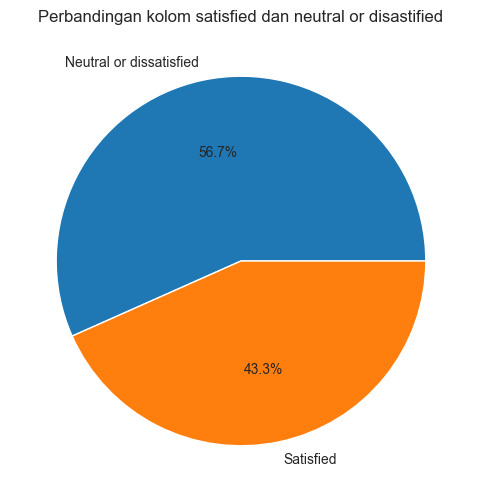

In [145]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct='%1.1f%%')
plt.title('Perbandingan kolom satisfied dan neutral or disastified')
plt.show()

Data target tidak sepenuhnya balance atau 1:1 dimana data neutral or dissatisfied lebih banyak, namun perbandingannya tidak terlalu besar hanya terdapat perbedaan 13.3% sehingga dapat dianggap data target masih berada pada rentang balance

## Categorical Feature

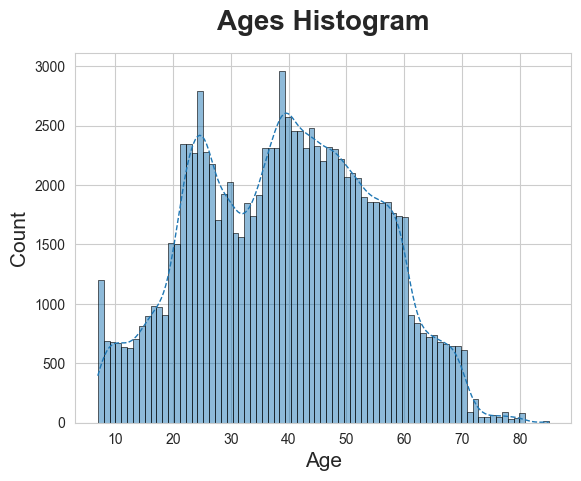

In [158]:
fig, ax = plt.subplots()

fig.figsize=(20,20)
ax.minorticks_on()
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(100))
plt.title('Ages Histogram',size=20,fontweight='bold',y=1.04)

sns.histplot(x='age',data=df,edgecolor='black',kde=True,line_kws={'lw': 1,'linestyle':'--'})

plt.xlabel('Age',size=15)
plt.ylabel('Count',size=15)


plt.show()

Jika dilihat pada histogram umur penumpang terbanyak pada range 35-45 tahun dan 20-30 tahun, hal tersebut ditandai dengan naiknya batang histogram pada rentang tersebut

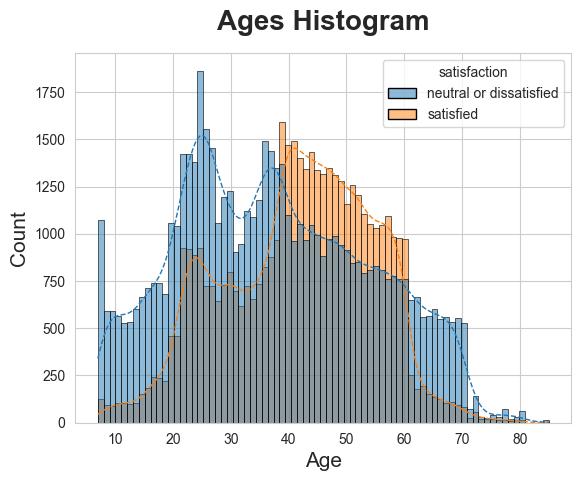

In [191]:
fig, ax = plt.subplots()

fig.figsize=(20,20)
ax.minorticks_on()
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(100))
plt.title('Ages Histogram with Satisfaction',size=20,fontweight='bold',y=1.04)

sns.histplot(x='age',data=df,edgecolor='black',hue = "satisfaction",kde=True,line_kws={'lw': 1,'linestyle':'--'})

plt.xlabel('Age',size=15)
plt.ylabel('Count',size=15)


plt.show()

Dari data histogram dapat dilihat bahwa yang tidak puas kebanyakan berada pada rentang 20 hingga 40 sedangkan untuk yang berada pada umur 40 hingga 60 kebanyakan merasa puas

## Plane type

Pada bagian ini kita akan melihat hubungan antara tipe penerbangan penumpang dengan kepuasannya terhadap penerbangan

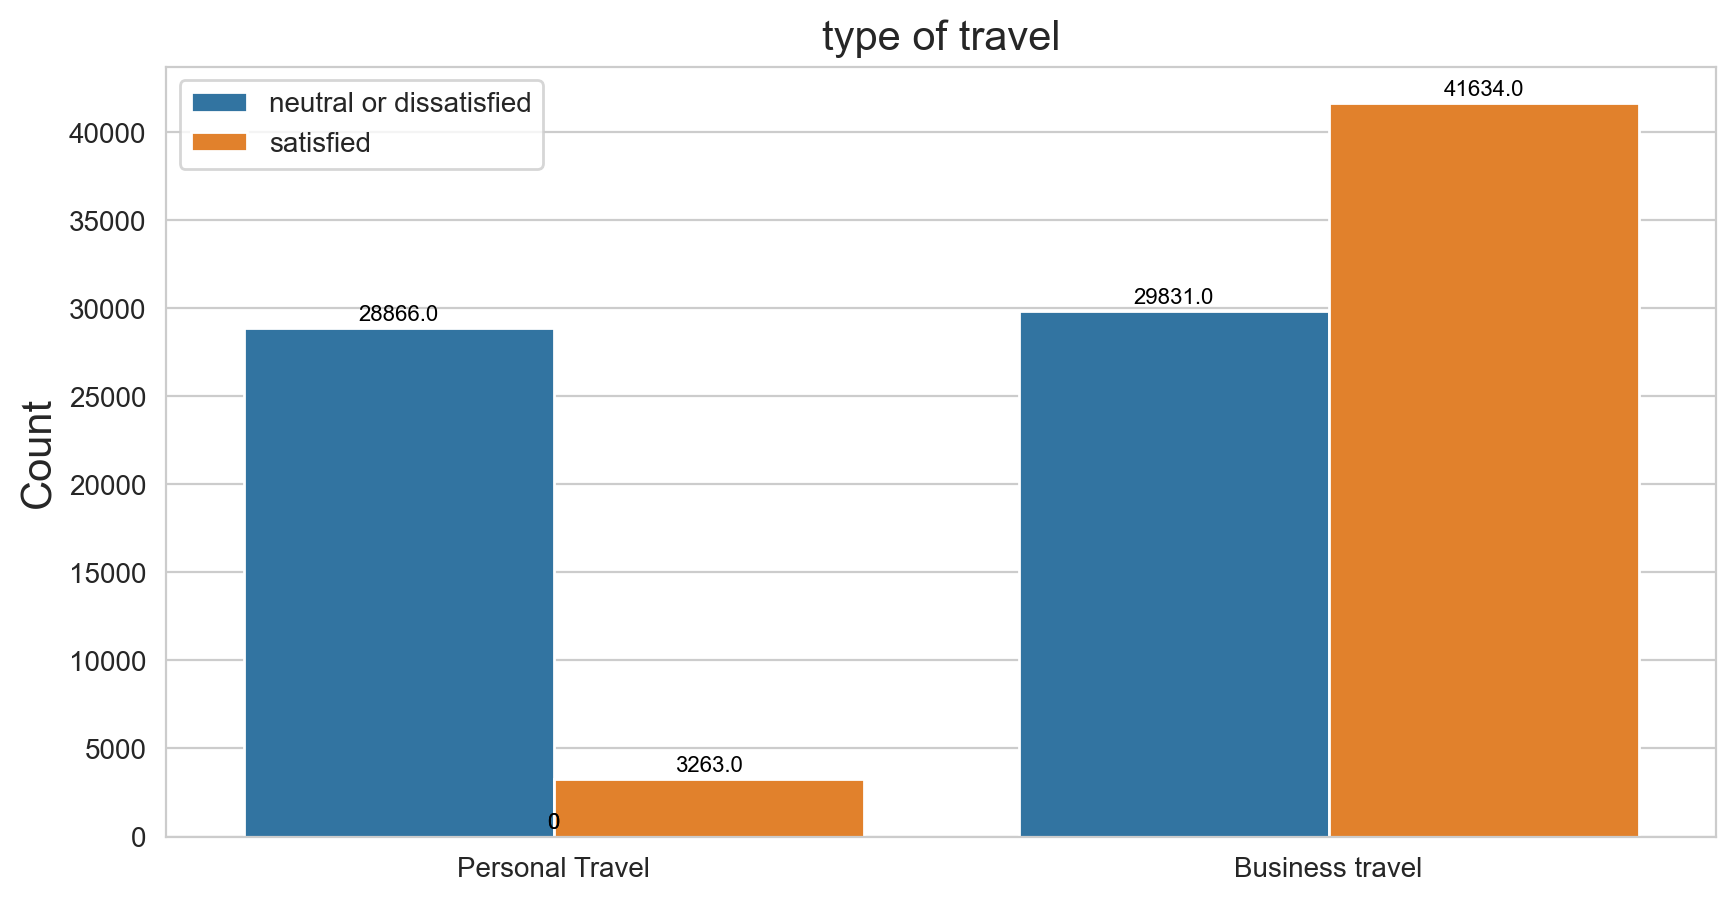

In [193]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='type of travel',hue='satisfaction',data=df)
ax.set_title('type of travel',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada barplot dapat terlihat penumpang yang melakukan perjalanan pribadi cenderung tidak puas dibandingkan dengan penumpang yang melakukan perjalan untuk keperluan bisnis, hal tersebut bisa disebabkan karena beberapa hal misalnya ketika melakukan perjalanan bisnis biaya pesawat di tanggung oleh perusahaan sehingga cenderung lebih senang dalam berpergian

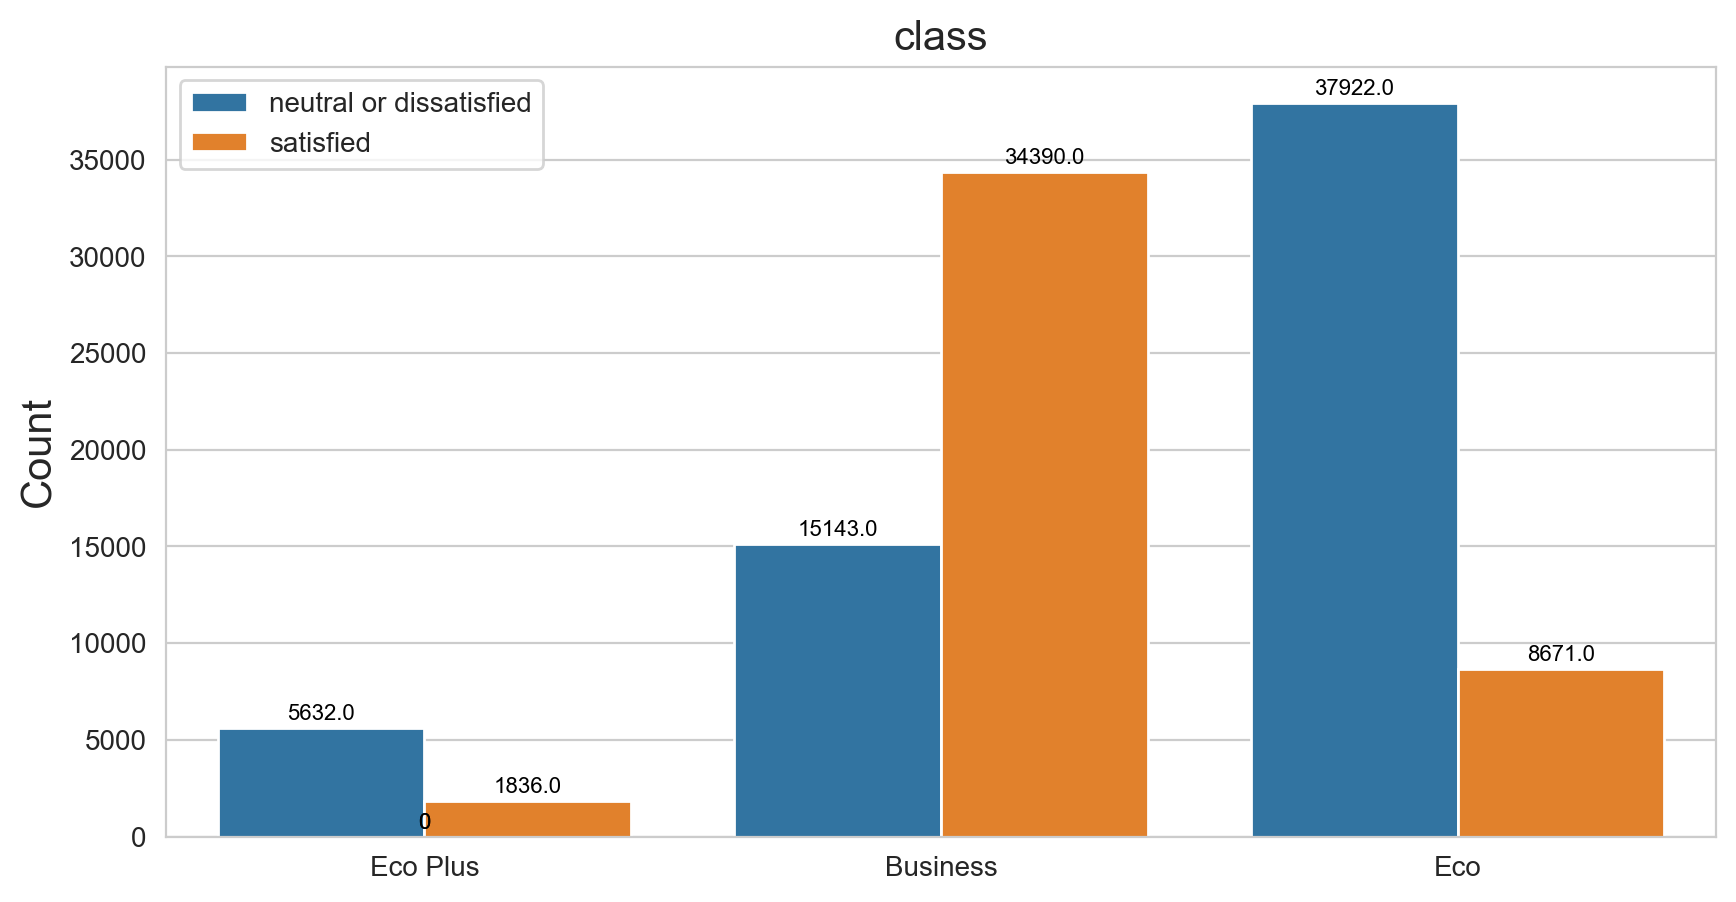

In [194]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='class',hue='satisfaction',data=df)
ax.set_title('class',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada class dapat terlihat perbedaan yang sangat signifikan pada tingkat kepuasaan kelas bisnis dan kelas eco, dimana pada kelas bisnis cenderung lebih puas dalam perjalanan dibandingkan orang" yang melakukan perjalanan dengan kelas eco begitupun dengan eco plus

## Rating Satisfaction

Pada bagian ini kita akan mengecek hubungan antara rating tiap penumpang di masing-masing kolom rating dengan kepuasannya terhadap penerbangan

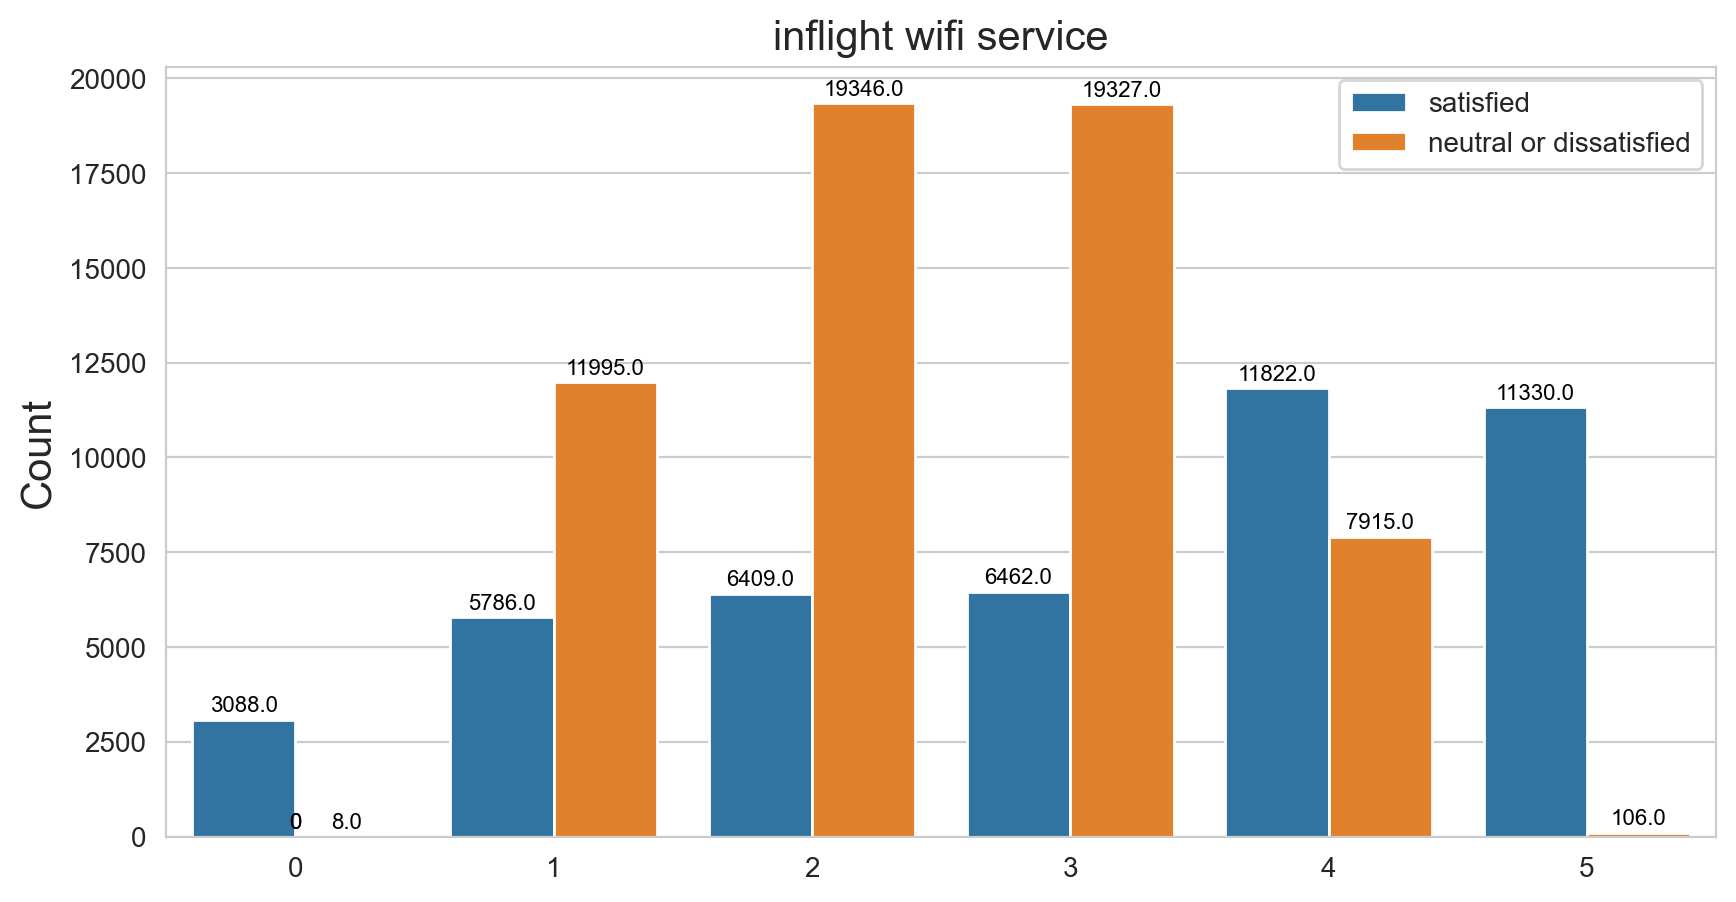

In [173]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='inflight wifi service',hue='satisfaction',data=df)
ax.set_title('inflight wifi service',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk inflight wifi service kebanyakan memberikan rating 2-3, dan terdapat korelasi yang besar antara inflight wifi service dengan kepuasan penumpang hal itu terlihat dari penumpang yang memberikan rating 4 dan 5 cenderung satisfied atau puas dibandingkan orang" yang memilih rating rendah

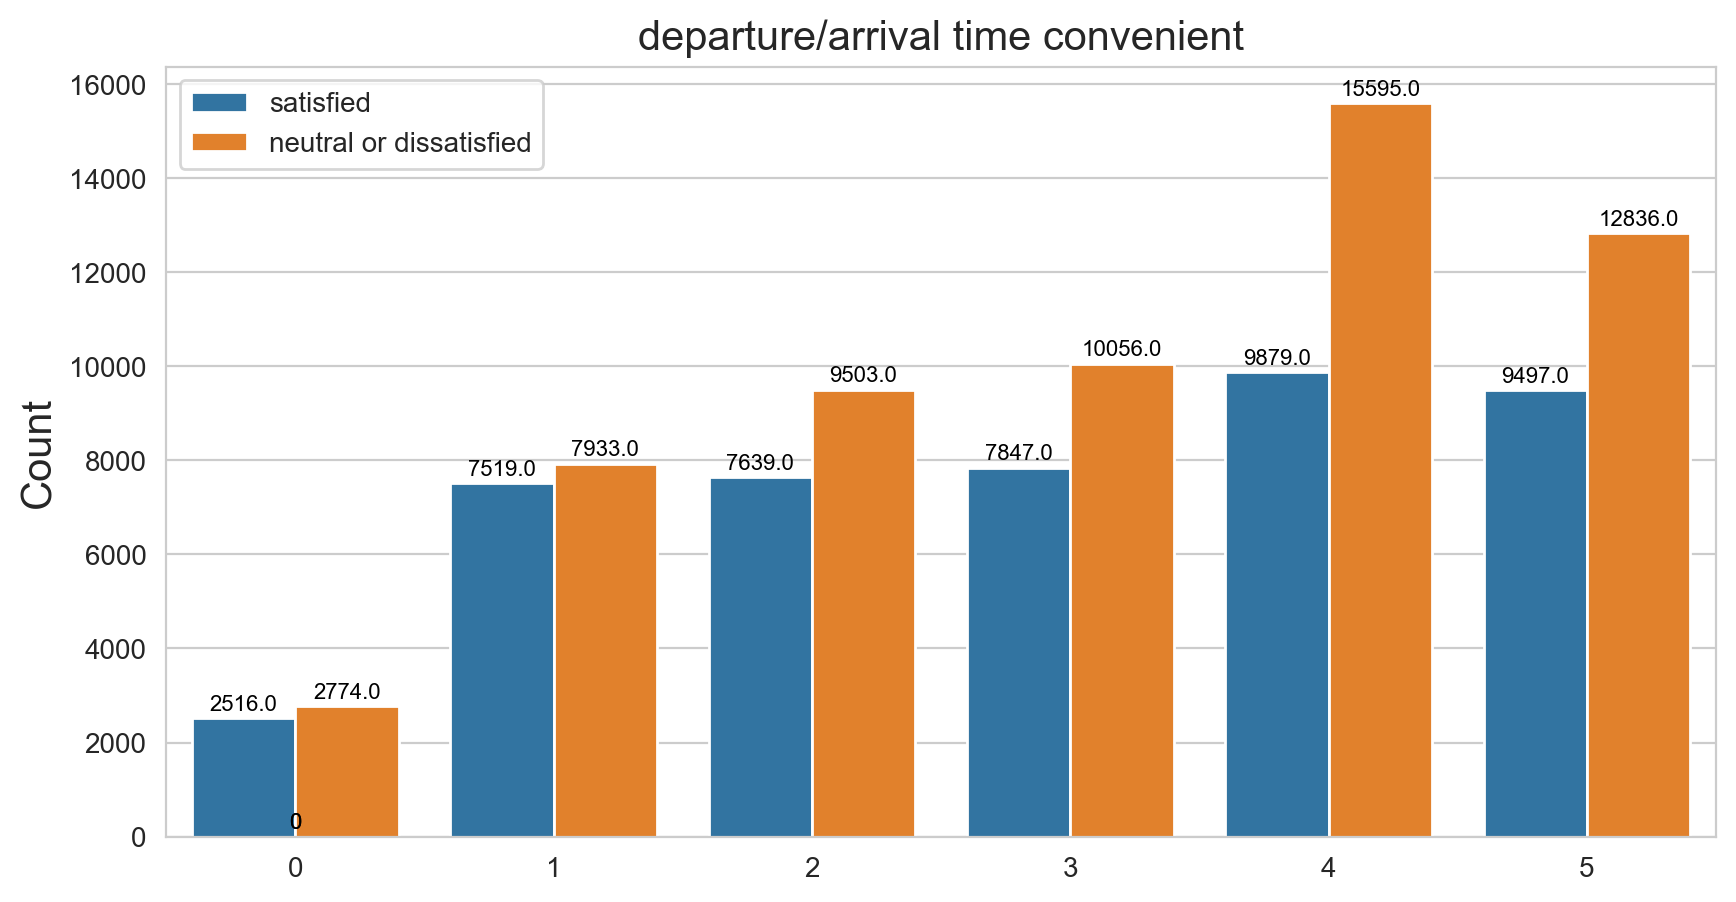

In [174]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='departure/arrival time convenient',hue='satisfaction',data=df)
ax.set_title('departure/arrival time convenient',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk departure/arrival kebanyakan memberikan rating 4-5, namun tidak terdapat korelasi yang besar antara departure/arrival dengan kepuasan penumpang hal itu terlihat dari penumpang yang memberikan rating 4 dan 5 cenderung tidak puas dibandingkan orang yang memilih rating dibawah 4

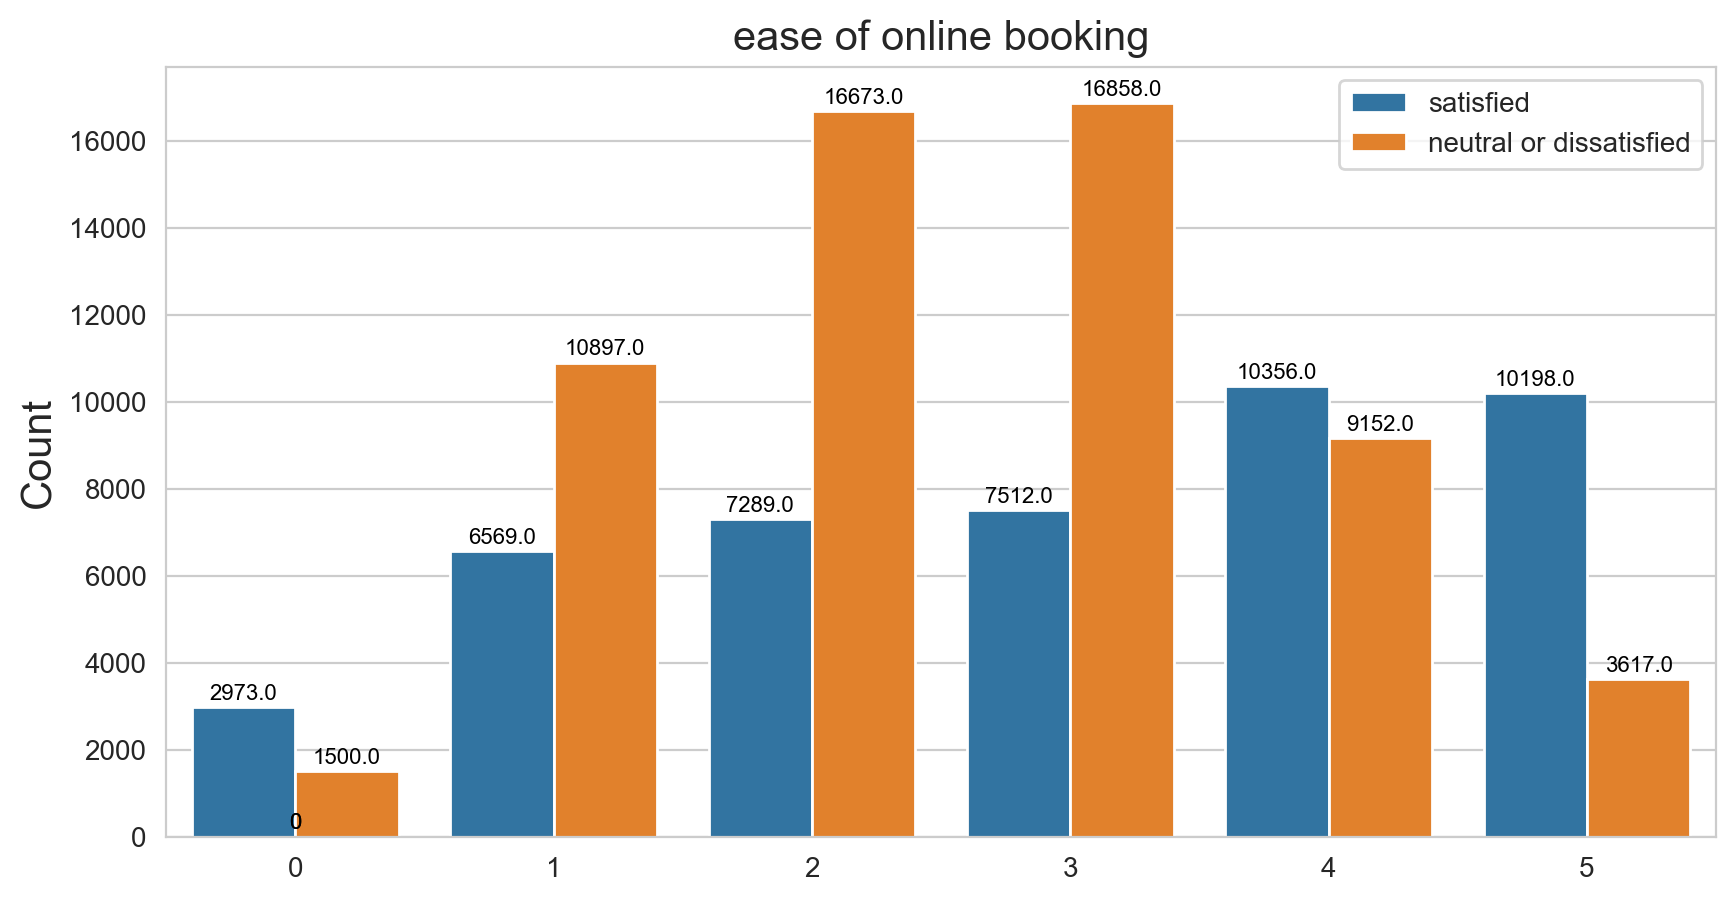

In [175]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='ease of online booking',hue='satisfaction',data=df)
ax.set_title('ease of online booking',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk ease of online booking kebanyakan memberikan rating 2-3, dan terdapat korelasi yang besar antara ease of online booking dengan kepuasan penumpang hal itu terlihat dari penumpang yang memberikan rating 4 dan 5 cenderung satisfied atau puas dibandingkan orang" yang memilih rating rendah

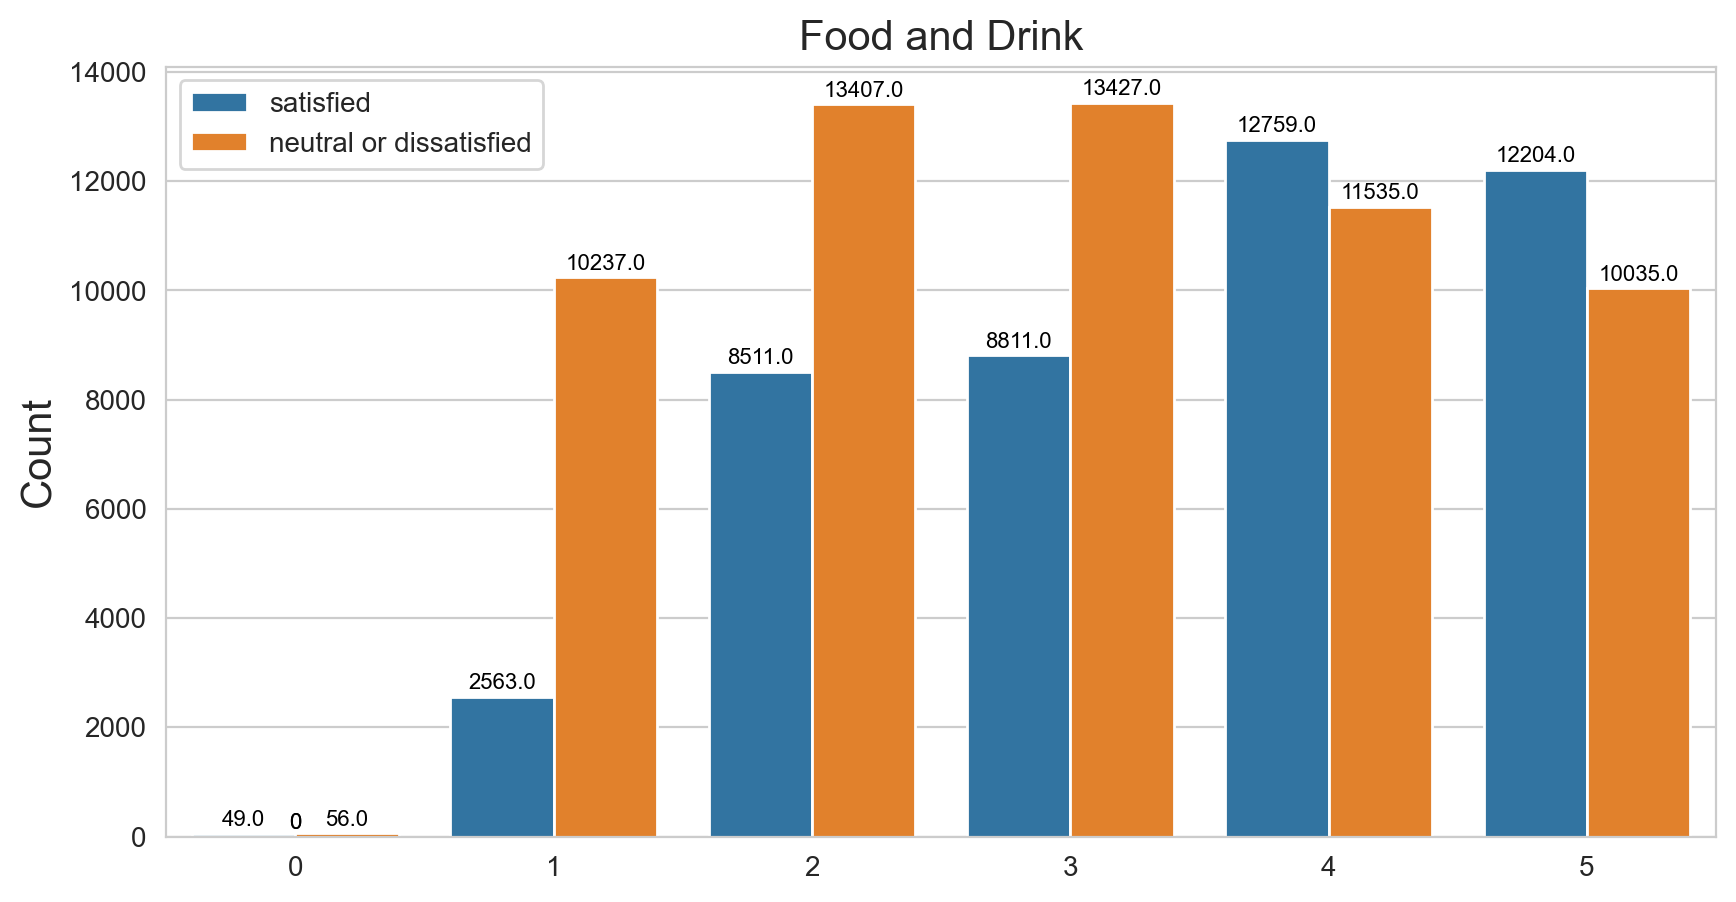

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5), dpi=200)

ax = sns.countplot(x='food and drink', hue='satisfaction', data=df)
ax.set_title('Food and Drink', size=15)
ax.legend(fontsize='10', loc='upper left')  

plt.xlabel('')
plt.ylabel('Count', size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk food and drink kebanyakan memberikan rating 2-5, dan terdapat korelasi namun tidak terlalu besar antara food and drink dengan kepuasan penumpang hal tersebut dapat dilihat dari naiknya persentase kepuasan pelanggan apabila rating food and drink semakin naik tetapi peningkatannya tidak sesignifikan itu

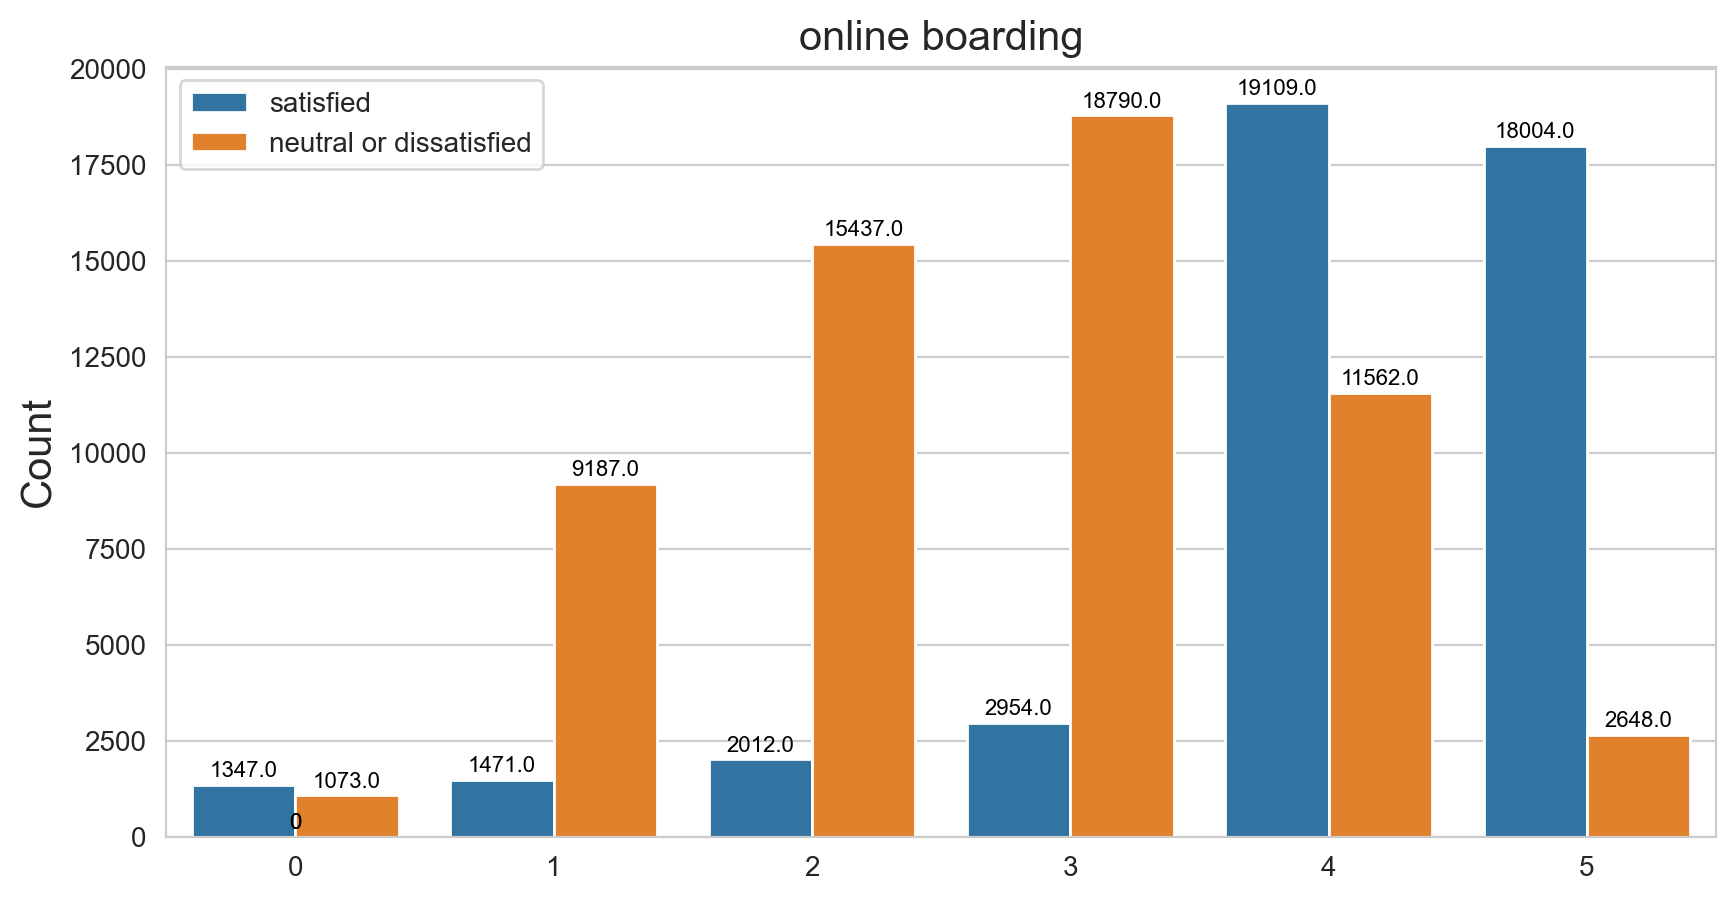

In [181]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='online boarding',hue='satisfaction',data=df)
ax.set_title('online boarding',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk online boarding kebanyakan memberikan rating 3-5, dan terdapat korelasi yang sangat besar antara online boarding dengan kepuasan penumpang hal itu terlihat dari sangat meningkatnya persentase kepuasan pelanggan ketika rating untuk online boardingnya meningkat

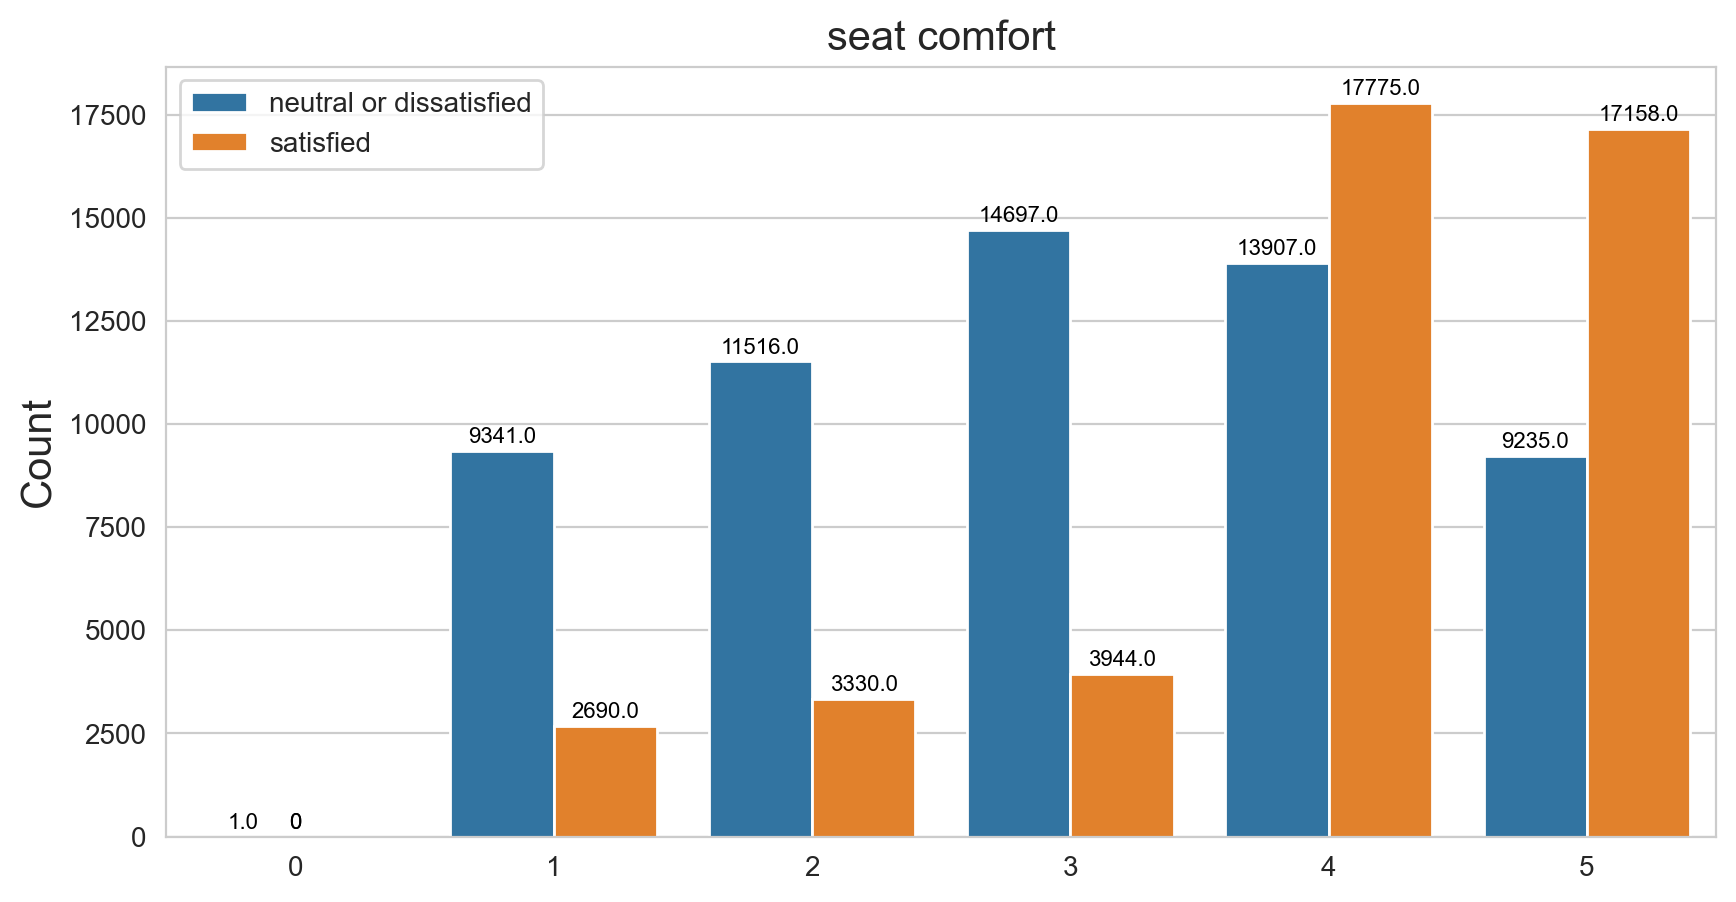

In [182]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='seat comfort',hue='satisfaction',data=df)
ax.set_title('seat comfort',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk seat comfort kebanyakan memberikan rating 4-5, dan terdapat negative korelasi yang cukup terlihat antara seat comfort dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang tidak puas ketika rating untuk seat comfortnya meningkat

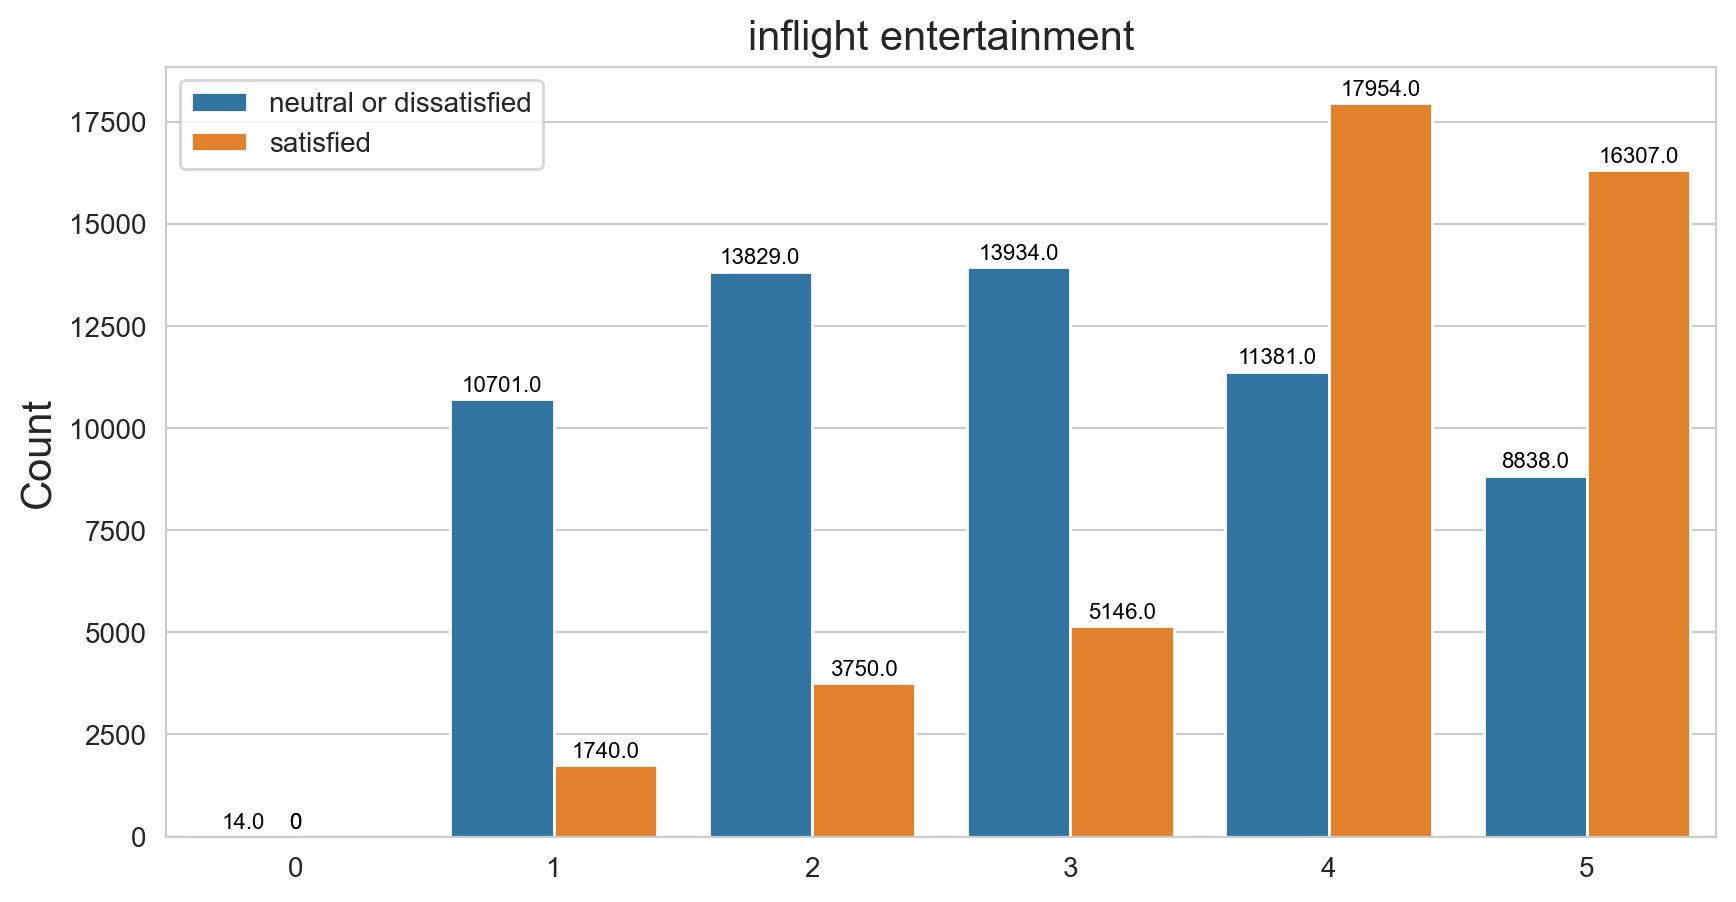

In [183]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='inflight entertainment',hue='satisfaction',data=df)
ax.set_title('inflight entertainment',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk inflight entertainment kebanyakan memberikan rating 4-5, dan terdapat korelasi yang cukup besar antara inflight entertainment dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang puas ketika rating untuk inflight entertainment meningkat

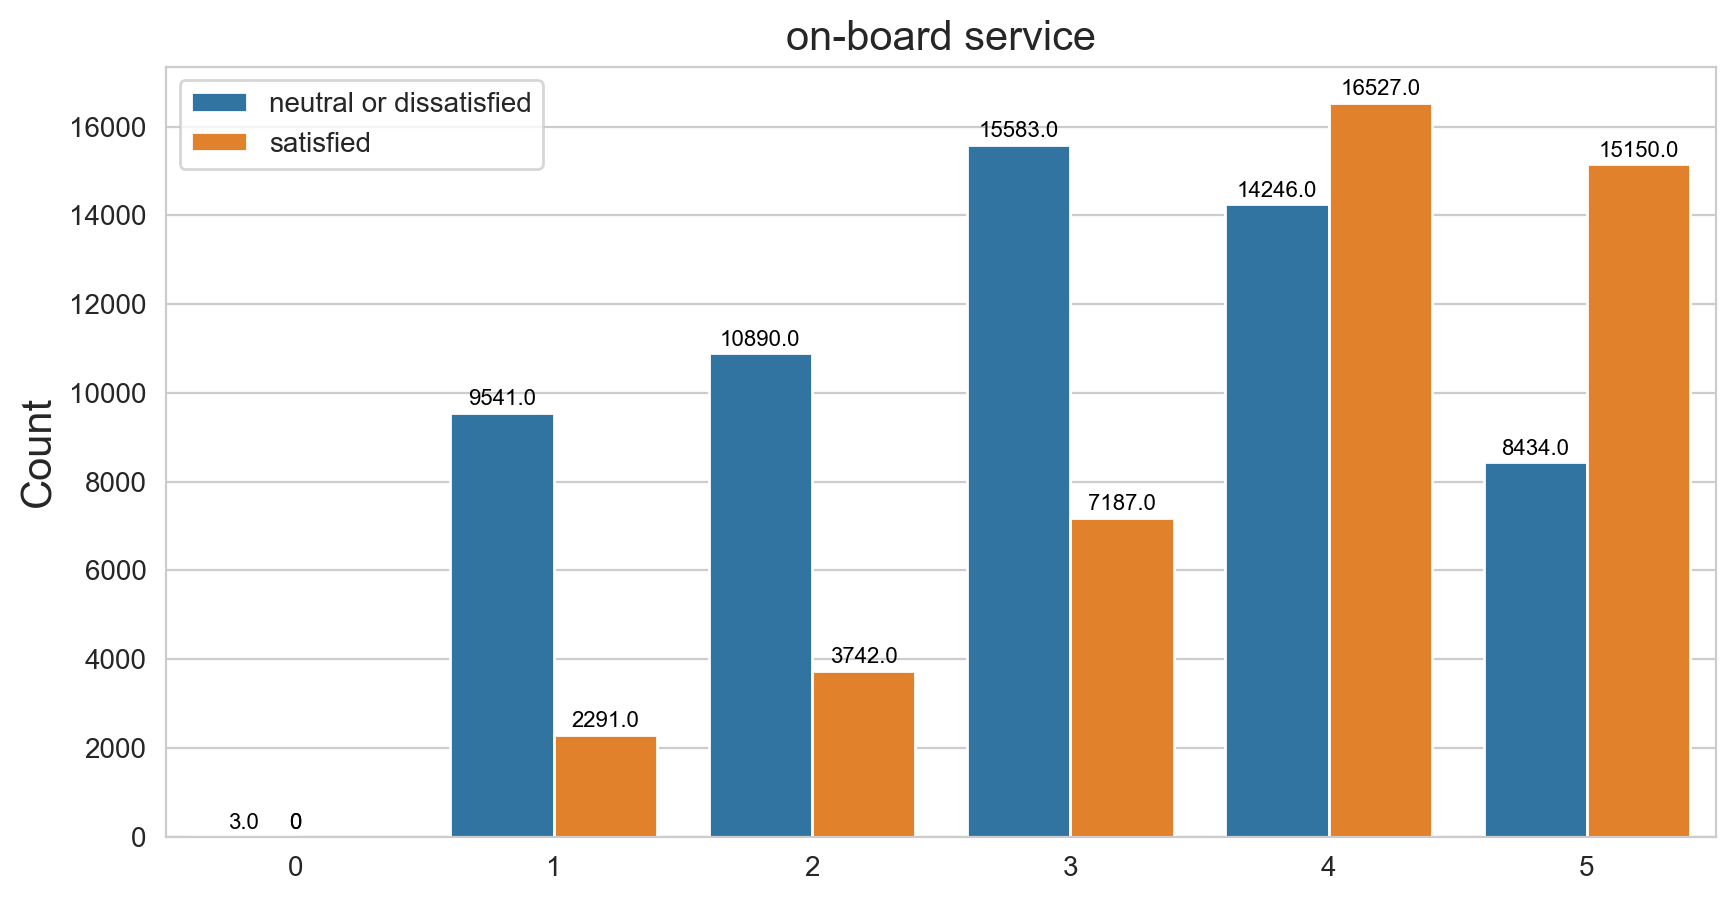

In [184]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='on-board service',hue='satisfaction',data=df)
ax.set_title('on-board service',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk on board service kebanyakan memberikan rating 4, dan terdapat korelasi yang cukup besar antara on board service dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang puas ketika rating untuk on board service meningkat

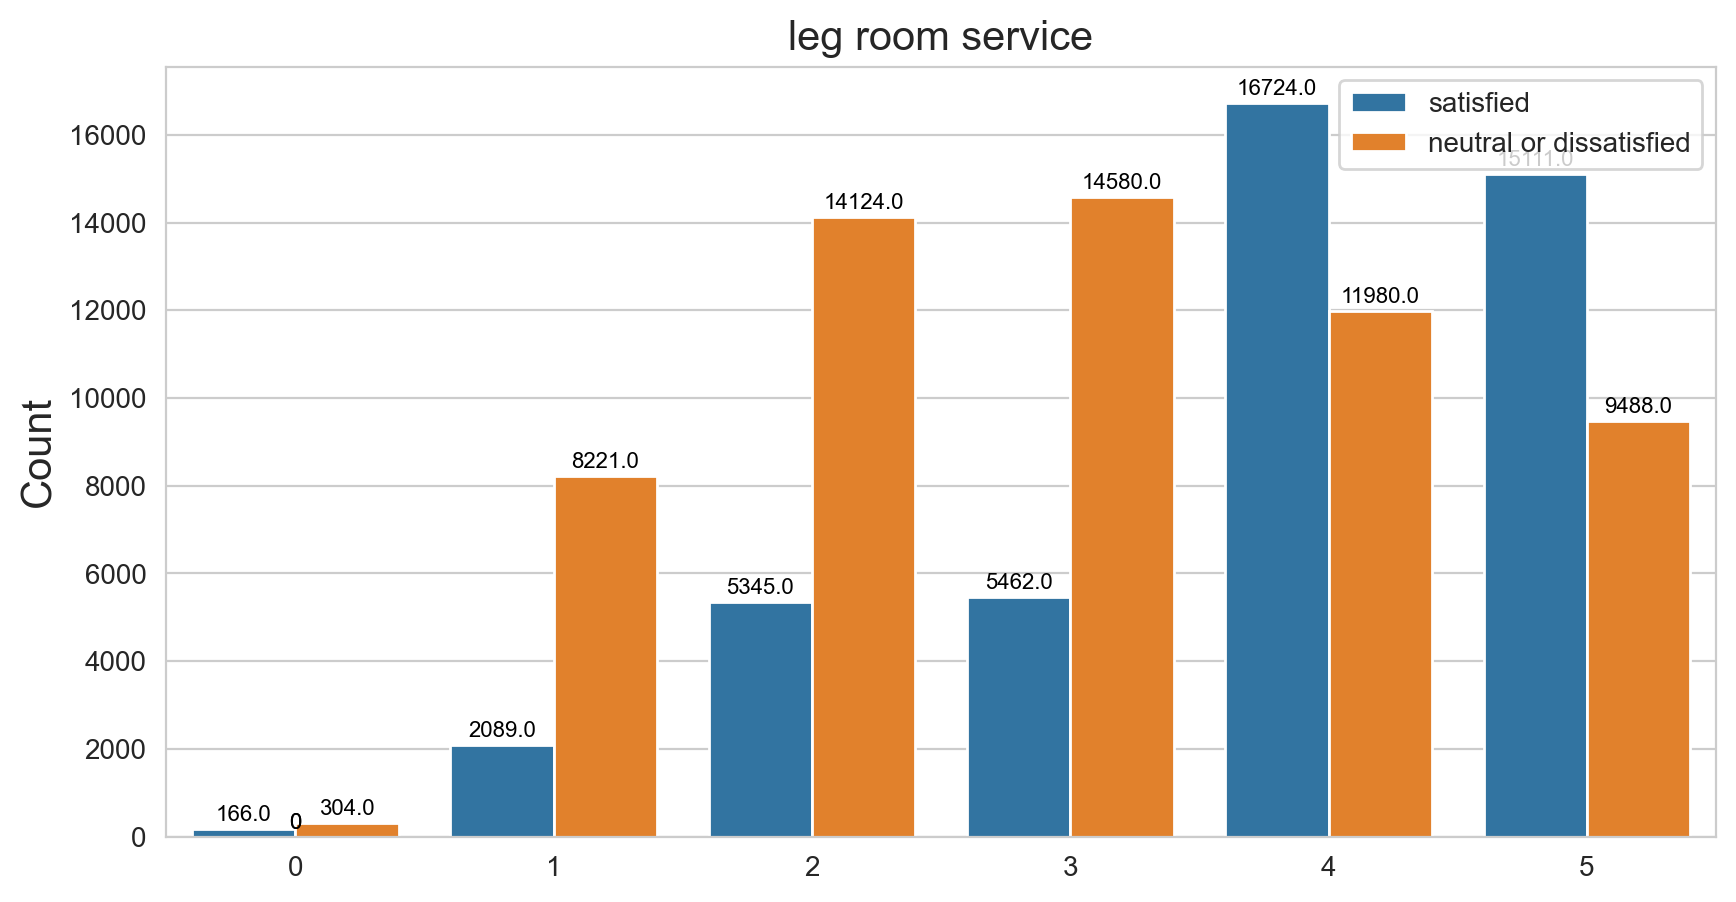

In [185]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='leg room service',hue='satisfaction',data=df)
ax.set_title('leg room service',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk leg service kebanyakan memberikan rating 4-5, dan terdapat negative korelasi antara leg service dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang tidak puas ketika rating untuk leg service meningkat

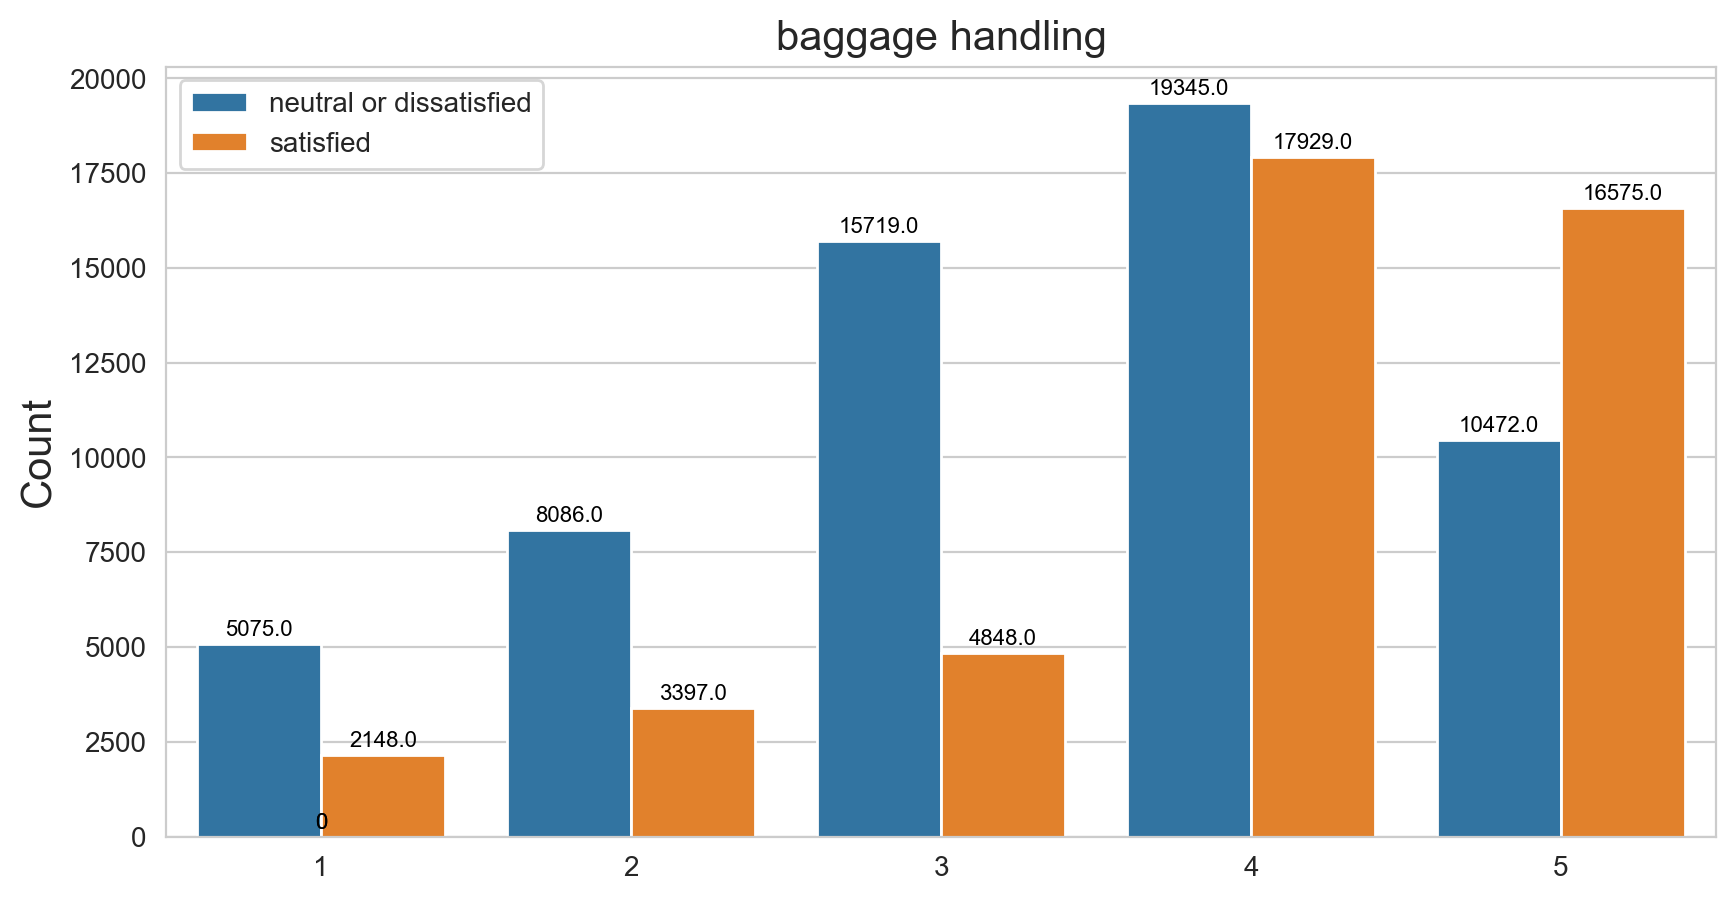

In [186]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='baggage handling',hue='satisfaction',data=df)
ax.set_title('baggage handling',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk baggage handling kebanyakan memberikan rating 4, dan terdapat korelasi antara baggage handling dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang puas ketika rating untuk baggage handling meningkat

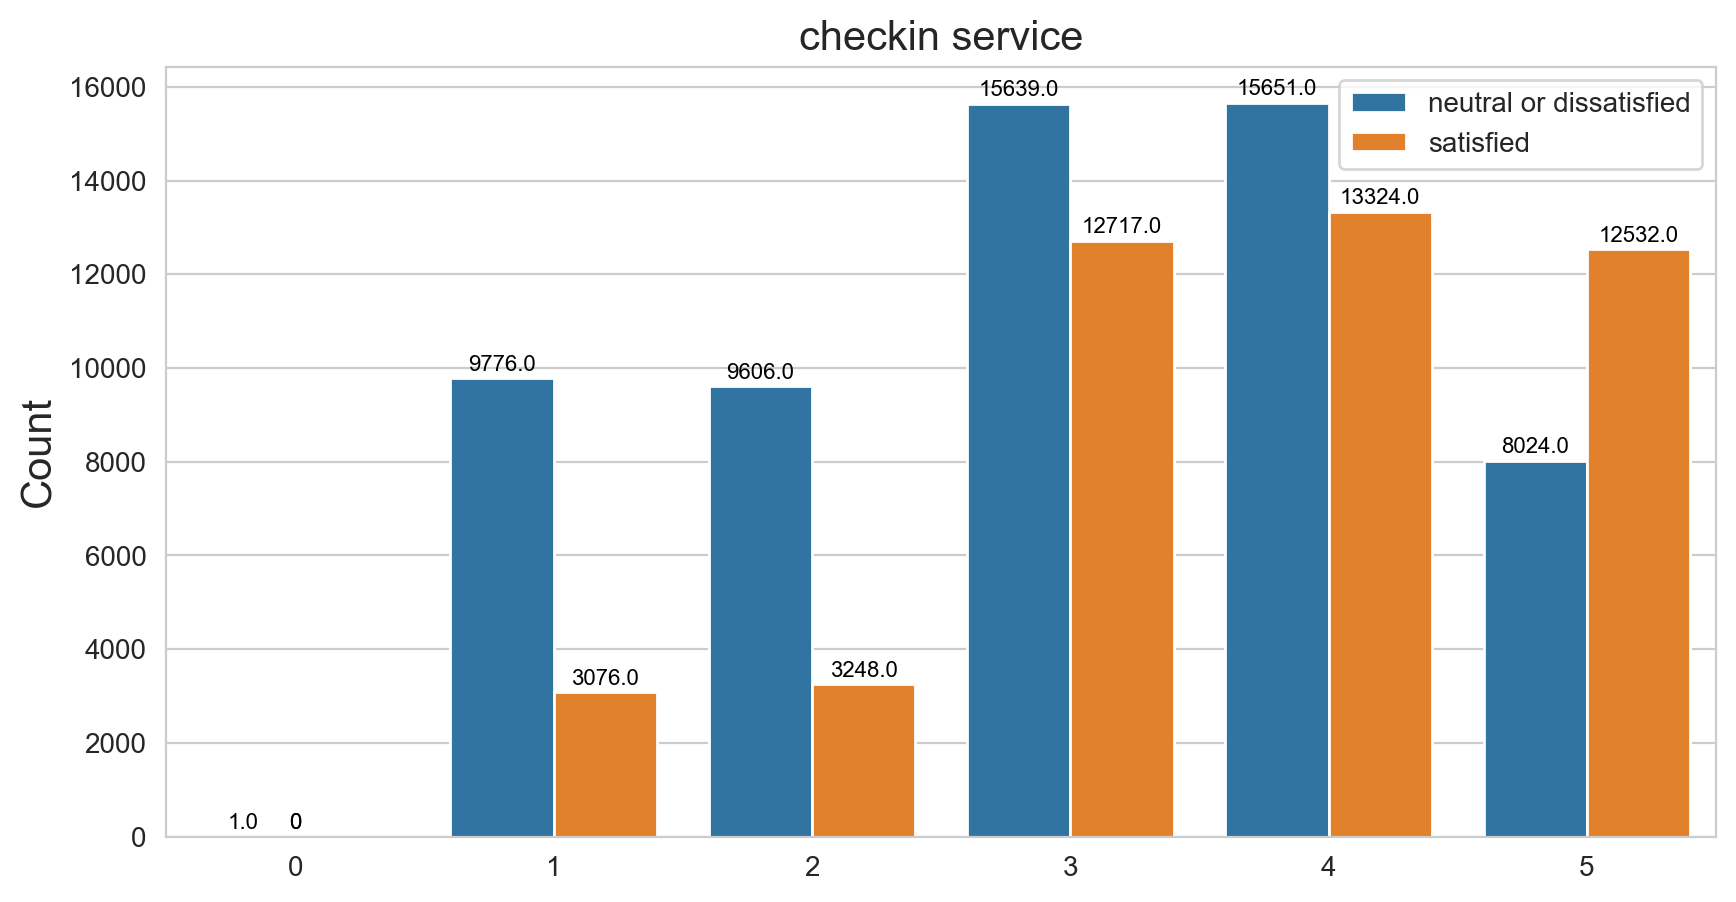

In [187]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='checkin service',hue='satisfaction',data=df)
ax.set_title('checkin service',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk checkin service kebanyakan memberikan rating 3-4, dan terdapat korelasi namun tidak terlalu terlihat antara checkin service dengan kepuasan penumpang dikarenakan stagnannya persentase antara kepuasan pelanggan meskipun rating pada checkin service meningkat

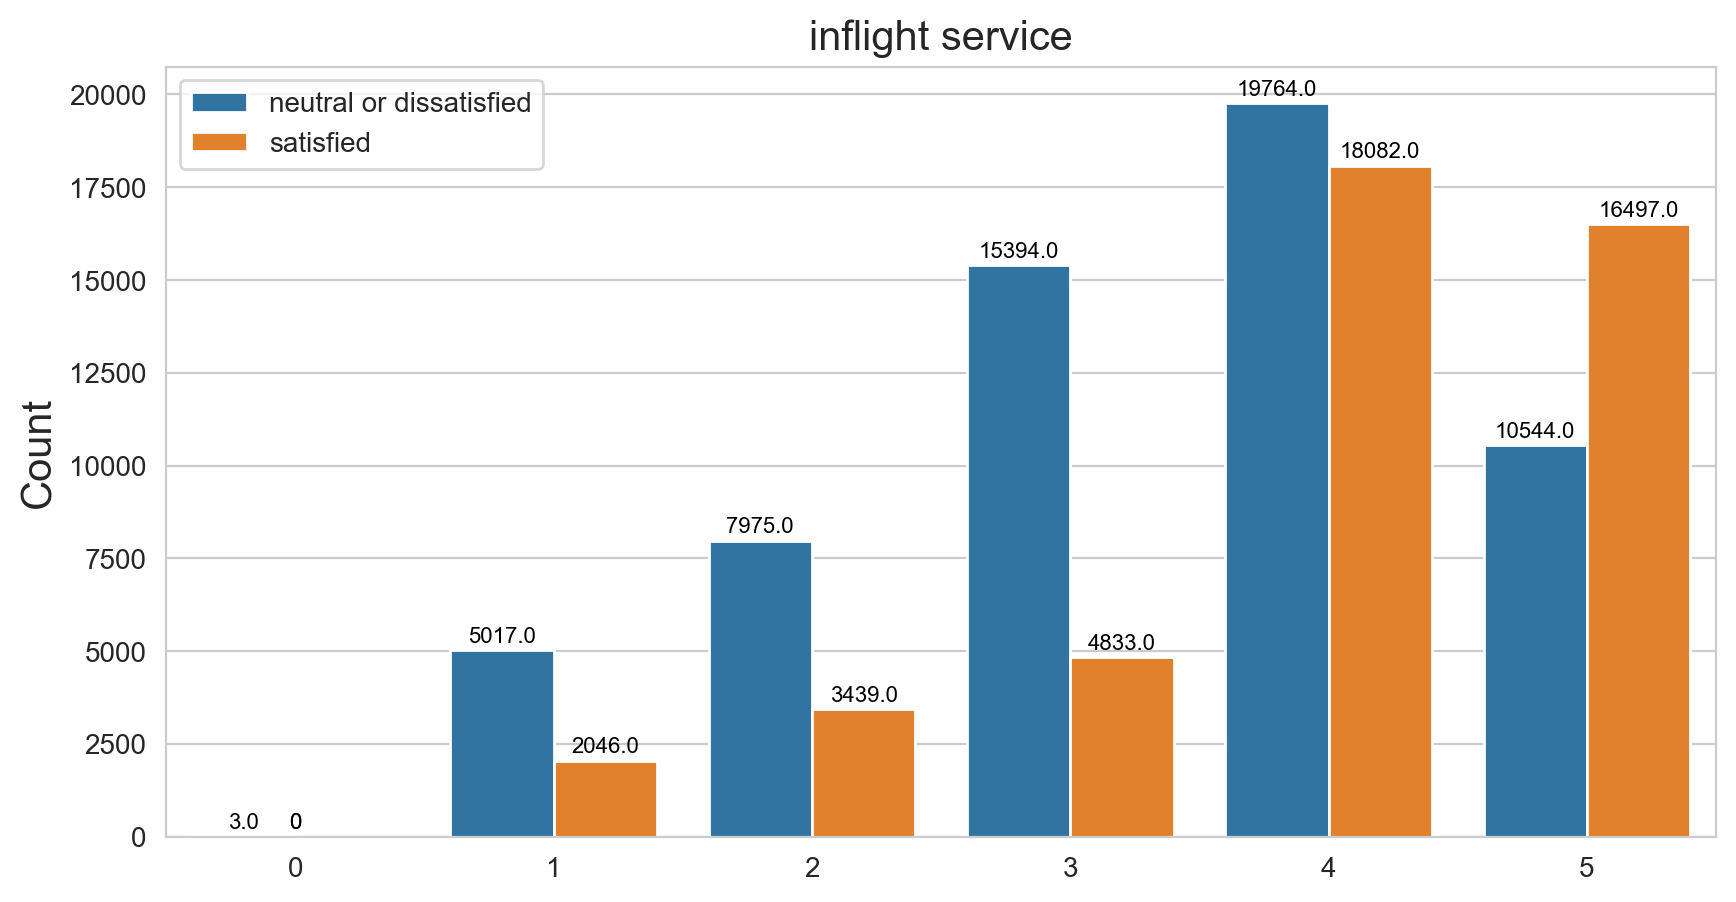

In [188]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='inflight service',hue='satisfaction',data=df)
ax.set_title('inflight service',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk inflight service kebanyakan memberikan rating 4-5, dan terdapat korelasi  antara inflight service dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang puas ketika rating untuk inflight service meningkat

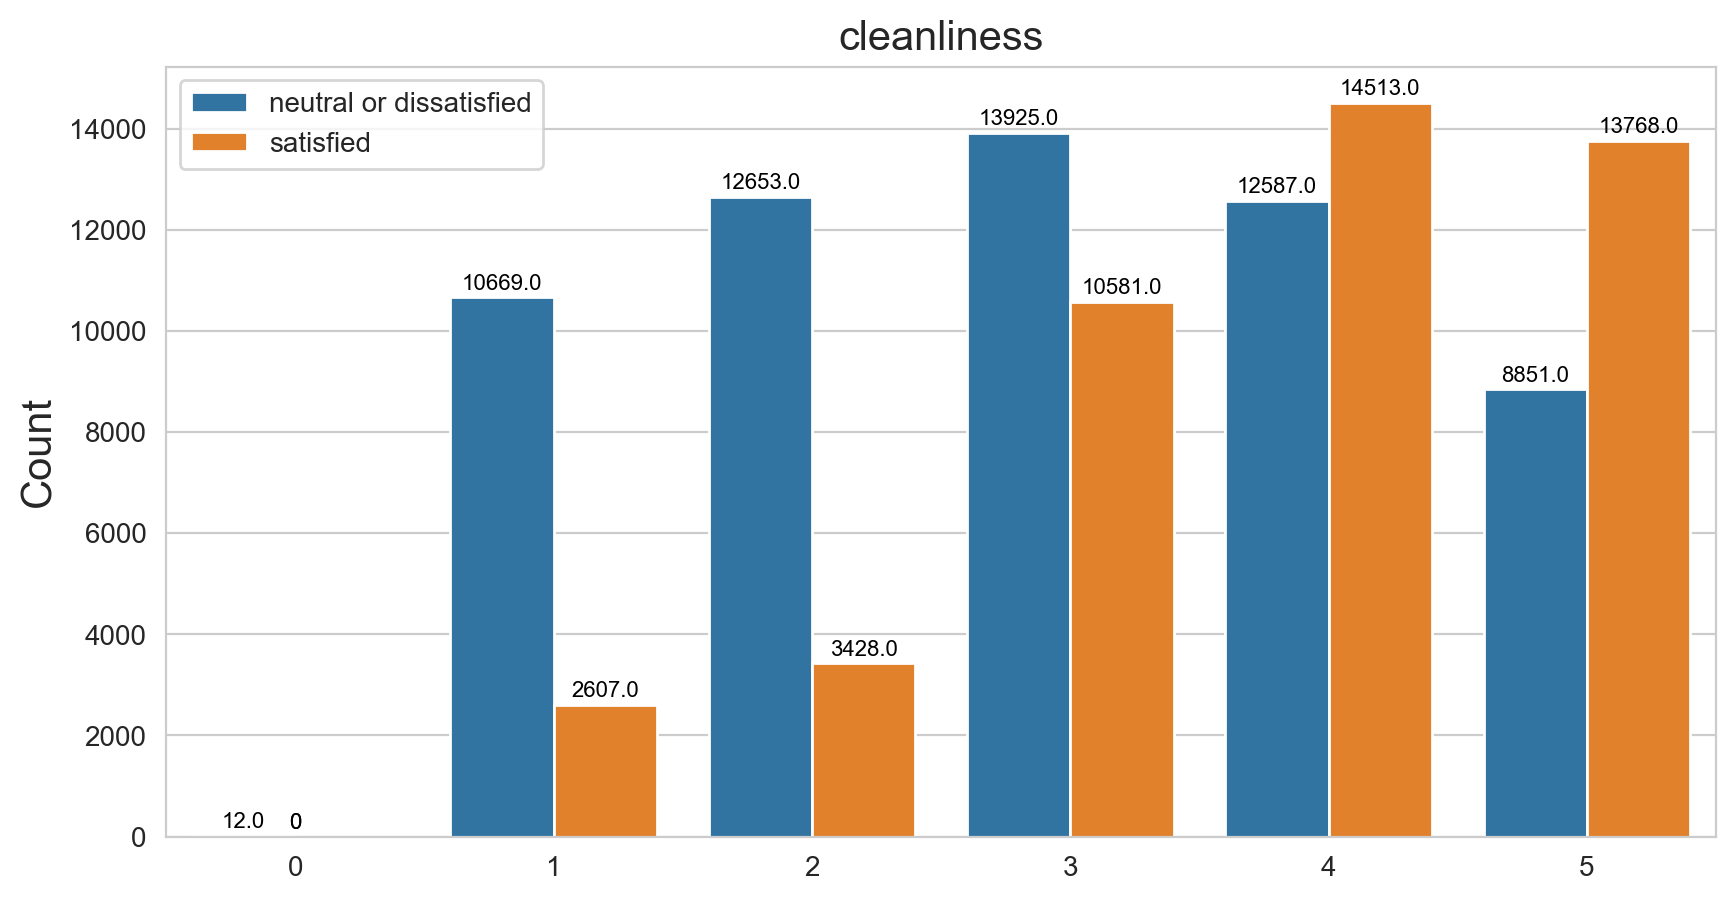

In [189]:
fig = plt.figure(figsize=(10,5),dpi=200)

ax=sns.countplot(x='cleanliness',hue='satisfaction',data=df)
ax.set_title('cleanliness',size=15)
ax.legend(fontsize='10')
plt.xlabel('')
plt.ylabel('Count',size=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

Pada rating untuk cleanliness kebanyakan memberikan rating 3-5, dan terdapat korelasi  antara cleanliness dengan kepuasan penumpang hal itu terlihat dari meningkatnya persentase pelanggan yang puas ketika rating untuk cleanliness meningkat

In [176]:
df.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction', 'generation'],
      dtype='object')

# V. FEATURE ENGINEERING

1. Select target (y)
2. Feature (X) selection
3. Dividing data into train-set and test-set
4. Data handling (duplicate, missing value, outlier)
5. Dividing feature (X) in train-set and test-set into categorical and numeric columns (column type)
6. Feature (X) transformation (normalization, scaling, encoding, etc)
7. Concatenate
8. and other necessary processes

## 1. Select Target Column (y)

In [66]:
df.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction', 'generation'],
      dtype='object')

In [67]:
# Split between feature (X) and target (y)
X = df.drop(["satisfaction"],axis=1)
y = df["satisfaction"]

Split price as target(y) and drop price column for feature (X)

## 2. Feature (X) selection

In [68]:
df.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction', 'generation'],
      dtype='object')

In [69]:
# Drop Column that we will not use
X.drop(['id', 'gender', 'customer type', 'age','departure/arrival time convenient','gate location','departure delay in minutes', 'arrival delay in minutes'], axis=1, inplace=True)

X.head()

,type of travel,class,flight distance,inflight wifi service,ease of online booking,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,generation
0,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,Generation z
1,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,Millennials
2,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,Millennials
3,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,Millennials
4,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,Baby Boomers


## 3. Split between Train-set and Test-set

In [70]:
# split train-set and test-set for feature (x)
X_train, X_test, y_train, y_test = train_test_split(X, y,              # split from feature and target
                                                    test_size= 0.20,   # Proportional 80% for train set and 20% for test set
                                                    random_state=17)  # Random state 17

# Show sape of feature(X) in Train-set and Data-set
print("Train size: ", X_train.shape)
print("Test siza: ", X_test.shape)

Train size:  (82875, 16)
Test siza:  (20719, 16)


Split train and test set with 80% for train-set data and 20% for test-set data.

## 4. Data Handling

### Handling Outlier

In [71]:
X.columns

Index(['type of travel', 'class', 'flight distance', 'inflight wifi service',
       'ease of online booking', 'food and drink', 'online boarding',
       'seat comfort', 'inflight entertainment', 'on-board service',
       'leg room service', 'baggage handling', 'checkin service',
       'inflight service', 'cleanliness', 'generation'],
      dtype='object')

In [72]:
num_col= ['flight distance']
cat_col= ['type of travel', 'class', 'inflight wifi service',
       'ease of online booking', 'food and drink', 'online boarding',
       'seat comfort', 'inflight entertainment', 'on-board service',
       'leg room service', 'baggage handling', 'checkin service',
       'inflight service', 'cleanliness', 'generation']

In [73]:
print("X_train")
for a in num_col:
    b = X_train[a].skew()
    print(a, "skew =", b)

print("\n")

print("X_test")      
for a in num_col:
    b = X_test[a].skew()
    print(a, "skew =", b)

X_train
flight distance skew = 1.1094534589352265


X_test
flight distance skew = 1.1117182508537404


Data flight distance pada X_train dan X_test masuk dalam kategori highly skew sehingga perlu dilakukan outlier handling

In [74]:
# Capping the skewed distribution

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=num_col)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [75]:
print("X_train")
for a in num_col:
    b = X_train_capped[a].skew()
    print(a, "skew =", b)

print("\n")

print("X_test")      
for a in num_col:
    b = X_test_capped[a].skew()
    print(a, "skew =", b)

X_train
flight distance skew = 1.1094534589352265


X_test
flight distance skew = 1.1117182508537404


## 5. Split Categorical and Numerical Columns

In [76]:
X

,type of travel,class,flight distance,inflight wifi service,ease of online booking,food and drink,online boarding,seat comfort,inflight entertainment,on-board service,leg room service,baggage handling,checkin service,inflight service,cleanliness,generation
0,Personal Travel,Eco Plus,460,3,3,5,3,5,5,4,3,4,4,5,5,Generation z
1,Business travel,Business,235,3,3,1,3,1,1,1,5,3,1,4,1,Millennials
2,Business travel,Business,1142,2,2,5,5,5,5,4,3,4,4,4,5,Millennials
3,Business travel,Business,562,2,5,2,2,2,2,2,5,3,1,4,2,Millennials
4,Business travel,Business,214,3,3,4,5,5,3,3,4,4,3,3,3,Baby Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Business travel,Eco,192,2,2,2,2,2,2,3,1,4,2,3,2,Millennials
103900,Business travel,Business,2347,4,4,2,4,5,5,5,5,5,5,5,4,Generation X
103901,Business travel,Business,1995,1,1,4,1,5,4,3,2,4,5,5,4,Millennials
103902,Business travel,Eco,1000,1,1,1,1,1,1,4,5,1,5,4,1,Millennials


In [77]:
X.columns

Index(['type of travel', 'class', 'flight distance', 'inflight wifi service',
       'ease of online booking', 'food and drink', 'online boarding',
       'seat comfort', 'inflight entertainment', 'on-board service',
       'leg room service', 'baggage handling', 'checkin service',
       'inflight service', 'cleanliness', 'generation'],
      dtype='object')

In [78]:
# Get numeric and category columns
num_col_skew= ["flight distance"]

cat_col_ord = ['class', 'inflight wifi service',
       'ease of online booking', 'food and drink', 'online boarding',
       'seat comfort', 'inflight entertainment', 'on-board service',
       'leg room service', 'baggage handling', 'checkin service',
       'inflight service', 'cleanliness']

cat_col_nom = ["type of travel",'generation']

print("Numeric columns: ", num_col_skew)
print("Ordinal category columns: ", cat_col_ord)
print("Nominal category columns: ", cat_col_nom)

Numeric columns:  ['flight distance']
Ordinal category columns:  ['class', 'inflight wifi service', 'ease of online booking', 'food and drink', 'online boarding', 'seat comfort', 'inflight entertainment', 'on-board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness']
Nominal category columns:  ['type of travel', 'generation']


### Split Train-set and Test-set Based on Column Type

In [79]:
# Feature train-set (X_train)
X_train_num_skew = X_train[num_col_skew]
X_train_cat_ord = X_train[cat_col_ord]
X_train_cat_nom = X_train[cat_col_nom]

# Feature test-set (X_test)
X_test_num_skew = X_test[num_col_skew]
X_test_cat_ord = X_test[cat_col_ord]
X_test_cat_nom = X_test[cat_col_nom]

### 6. Feature Transformation

#### Scaling

In [80]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train_num_skew)

X_train_num_scaled_skew = scaler_minmax.transform(X_train_num_skew)
X_test_num_scaled_skew= scaler_minmax.transform(X_test_num_skew)

X_train_num_scaled_skew

array([[0.12984653],
       [0.30916801],
       [0.70638126],
       ...,
       [0.12984653],
       [0.18053312],
       [0.08663166]])

Dikarenakan semua numerical skew maka scaler yang digunakan adalah minmax scaler

#### Encoding

##### Nominal Encoder

In [81]:
encoder_n = OneHotEncoder(sparse=False)

encoder_n.fit(X_train_cat_nom)

X_train_cat_nom_encoded = encoder_n.transform(X_train_cat_nom)
X_test_cat_nom_encoded = encoder_n.transform(X_test_cat_nom)

display(X_train_cat_nom_encoded)
display(X_test_cat_nom_encoded)

c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

##### Ordinal Encoder

In [82]:
# Feature Encoding - Features
encoder = OrdinalEncoder(categories=[
    ['Eco','Eco Plus','Business'],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5]])
encoder.fit(X_train_cat_ord)

X_train_cat_ord_encoded = encoder.transform(X_train_cat_ord)
X_test_cat_ord_encoded = encoder.transform(X_test_cat_ord)

## 7. Concate Between Numeric and Categorical Column

In [83]:
# Concate columns
X_train_final = np.concatenate([X_train_num_scaled_skew, X_train_cat_nom_encoded,X_train_cat_ord_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled_skew,X_test_cat_nom_encoded,X_test_cat_ord_encoded], axis = 1)

In [84]:
X_train_final.shape

(82875, 21)

# VI. MODEL DEFINITION

Untuk melakukan classification maka digunakan logistic regression,KNN, dan SVM

## KNN

In [85]:
# Baseline Model using Random KNN

knn = KNeighborsClassifier()

## SVM

In [86]:
# Baseline Model using SVM

svm = SVC()

## Decision Tree

In [87]:
# Baseline Model using Decision tree

model_dt = DecisionTreeClassifier()

## Random Forest

In [88]:
# Baseline Model using Random Forest Algorithm

rf = RandomForestClassifier()

## Adaboost

In [89]:
# Baseline Model using Random Forest Algorithm

clf = AdaBoostClassifier()

# VII. MODEL TRAINING

In [90]:
# Train KNN model
knn.fit(X_train_final, y_train) # "Fit" the model to the Featurue (X) train set we've prepared and Target (y) train-set

KNeighborsClassifier()

In [91]:
# Predict using baseline knn
y_train_pred_knn = knn.predict(X_train_final)
y_test_pred_knn = knn.predict(X_test_final)

In [92]:
# Train SVC model
svm.fit(X_train_final, y_train) # "Fit" the model to the Featurue (X) train set we've prepared and Target (y) train-set

SVC()

In [93]:
# Predict using baseline svc
y_train_pred_svc = svm.predict(X_train_final)
y_test_pred_svc = svm.predict(X_test_final)

In [94]:
# Train decision tree model
model_dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [95]:
# Predict using baseline decision tree
y_train_pred_dt = model_dt.predict(X_train_final)
y_test_pred_dt = model_dt.predict(X_test_final)

In [96]:
# Train random forest model
rf.fit(X_train_final, y_train)

RandomForestClassifier()

In [97]:
# Predict using random forest
y_train_pred_rf = rf.predict(X_train_final)
y_test_pred_rf = rf.predict(X_test_final)

In [98]:
# Train random forest model
clf.fit(X_train_final, y_train)

AdaBoostClassifier()

In [99]:
# Predict using random forest
y_train_pred_clf = clf.predict(X_train_final)
y_test_pred_clf = clf.predict(X_test_final)

# VIII. MODEL EVALUATION

## Evaluation Metrics

In [100]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train,pos_label='satisfied'),
      'train - recall' : recall_score(y_train, y_pred_train,pos_label='satisfied'),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train,pos_label='satisfied'),
      'test - precision' : precision_score(y_test, y_pred_test,pos_label='satisfied'),
      'test - recall' : recall_score(y_test, y_pred_test,pos_label='satisfied'),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test,pos_label='satisfied'),
  }
  all_reports[name] = score_reports
  return all_reports

In [101]:
# Evaluate the model

# KNN baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_knn, y_test, y_test_pred_knn, 'KNN Baseline')
pd.DataFrame(all_reports)

# SVC baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_svc, y_test, y_test_pred_svc, 'SVM Baseline')
pd.DataFrame(all_reports)

# DT baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_dt, y_test, y_test_pred_dt, 'DT Baseline')
pd.DataFrame(all_reports)

# RF baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_rf, y_test, y_test_pred_rf, 'RF Baseline')
pd.DataFrame(all_reports)

# RF baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_clf, y_test, y_test_pred_clf, 'Adaboost Baseline')
pd.DataFrame(all_reports)

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,Adaboost Baseline
train - precision,0.963464,0.936367,1.000000,1.000000,0.908903
train - recall,0.921083,0.917165,0.999972,0.999944,0.890516
train - accuracy,0.950564,0.936965,0.999988,0.999976,0.913701
train - f1_score,0.941797,0.926666,0.999986,0.999972,0.899615
test - precision,0.945077,0.936075,0.918593,0.961588,0.910955
test - recall,0.894164,0.912121,0.923232,0.929966,0.887542
test - accuracy_score,0.932140,0.935422,0.931802,0.953907,0.914330
test - f1_score,0.918916,0.923943,0.920907,0.945513,0.899096


Matriks yang akan menjadi perhatian atau fokus adalah `recall` dikarenakan false positive lebih penting atau kesalahan memprediksi pelanggan yang harusnya `tidak puas` menjadi `puas`, sehingga nantinya `promo` ataupun `ide bisinis` yang akan diterapkan kepada orang" yang tidak puas menjadi `tidak tepat sasaran`.

Dari kelima baseline model yang dilakukan pengetesan nilai `train` untuk `recallnya` sudah memuaskan yaitu berada pada `range 0,89 - 1`, dengan model terbaik yaitu `random forest` dengan nilai `1` lalu yang kedua adalah `decision tree` dengan nilai `0.99` dan apabila dibulatkan akan menjadi `1`. Model `terburuk` adalah `adaboost` dengan nilai recall sebesar `0.89`.

Meskipun model `decision tree` dan `random forest` memiliki nilai recall sebesar `0.99` dan `1` untuk `trainenya`, namun pada bagian `test` nilai untuk `decision tree` sebesar `0.92` dan untuk `random forest` sebesar `0.93` memang nilai ini sudah `cukup bagus` namun masih memiliki nilai yang `berbeda` dengan nilai `recall` pada trainenya sehingga nantinya akan dilakukan `hyperparameter tuning` pada `kedua model` terbaik tersebut

In [102]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(knn,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.8892872  0.88712904 0.88887963]
recall Score - Mean - Cross Validation :  0.8884319575192565
recall Score - Std - Cross Validation  :  0.00093620485573116
recall Score - Range of Test-Set       :  0.8874957526635253 - 0.8893681623749877


In [103]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(svm,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.91771571 0.9108036  0.91505502]
recall Score - Mean - Cross Validation :  0.914524778140349
recall Score - Std - Cross Validation  :  0.002846658261380763
recall Score - Range of Test-Set       :  0.9116781198789683 - 0.9173714364017298


In [104]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(model_dt,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.92105044 0.92305769 0.92505835]
recall Score - Mean - Cross Validation :  0.9230554921206425
recall Score - Std - Cross Validation  :  0.001636225224000357
recall Score - Range of Test-Set       :  0.9214192668966422 - 0.9246917173446428


In [105]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(rf,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.92805336 0.92864288 0.93189396]
recall Score - Mean - Cross Validation :  0.929530067060008
recall Score - Std - Cross Validation  :  0.0016887656098038576
recall Score - Range of Test-Set       :  0.927841301450204 - 0.9312188326698119


In [106]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(clf,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

recall Score - All - Cross Validation  :  [0.89095456 0.89013004 0.8902134 ]
recall Score - Mean - Cross Validation :  0.8904326707392576
recall Score - Std - Cross Validation  :  0.0003706004275727291
recall Score - Range of Test-Set       :  0.8900620703116848 - 0.8908032711668303


## Model Improvement

### Decision Tree

In [107]:
# Decision Tree Parameters
dt_params = {'criterion':['gini', 'entropy', 'log_loss'],
                 'splitter':['best','random'],
                 'min_samples_split':[2,4,6],
                 'min_samples_leaf':[1,3,5]
}

recall_scorer = make_scorer(recall_score, pos_label='satisfied')

# Train with Grid Search
dt_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=77),
                             param_grid=dt_params,
                             n_jobs=1,
                             verbose=2,
                             scoring=recall_scorer)

dt_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.5s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, min_s

GridSearchCV(estimator=DecisionTreeClassifier(random_state=77), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(recall_score, pos_label=satisfied), verbose=2)

In [108]:
# Get Best Hyperparameters
dt_gridcv.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [109]:
# Get Best Estimator
dt_gridcv_best = dt_gridcv.best_estimator_

In [110]:
# Predict using logistic regression best parameter
y_train_pred_dt_gridcv = dt_gridcv_best.predict(X_train_final)
y_test_pred_dt_gridcv = dt_gridcv_best.predict(X_test_final)

In [111]:
# SVC baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_dt_gridcv, y_test, y_test_pred_dt_gridcv, 'DT tuning')
pd.DataFrame(all_reports)

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,Adaboost Baseline,DT tuning
train - precision,0.963464,0.936367,1.000000,1.000000,0.908903,1.000000
train - recall,0.921083,0.917165,0.999972,0.999944,0.890516,0.999972
train - accuracy,0.950564,0.936965,0.999988,0.999976,0.913701,0.999988
train - f1_score,0.941797,0.926666,0.999986,0.999972,0.899615,0.999986
test - precision,0.945077,0.936075,0.918593,0.961588,0.910955,0.919633
test - recall,0.894164,0.912121,0.923232,0.929966,0.887542,0.922110
test - accuracy_score,0.932140,0.935422,0.931802,0.953907,0.914330,0.931850
test - f1_score,0.918916,0.923943,0.920907,0.945513,0.899096,0.920870


### Random Forest

In [112]:
# Random Forest Parameters
rf_params = {'criterion':['gini', 'entropy', 'log_loss'],
                 'min_samples_split':[2,4,6],
                 'min_samples_leaf':[1,3,5]
}

recall_scorer = make_scorer(recall_score, pos_label='satisfied')

# Train with Grid Search
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(random_state=77),
                             param_grid=rf_params,
                             n_jobs=1,
                             verbose=2,
                             scoring=recall_scorer)

rf_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   8.2s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   8.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   8.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   8.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=2; total time=   8.0s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=4; total time=   7.7s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=4; total time=   7.6s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=4; total time=   7.7s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=4; total time=   7.6s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=4; total time=   7.6s
[CV] END criterion=gini, min_samples_leaf=1, min_samples_split=6; total time=   7.4s
[CV

GridSearchCV(estimator=RandomForestClassifier(random_state=77), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             scoring=make_scorer(recall_score, pos_label=satisfied), verbose=2)

In [113]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [114]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

In [115]:
# Predict using logistic regression best parameter
y_train_pred_rf_gridcv = rf_gridcv_best.predict(X_train_final)
y_test_pred_rf_gridcv = rf_gridcv_best.predict(X_test_final)

In [116]:
# SVC baseline evaluation
all_reports = performance_report(all_reports, y_train, y_train_pred_rf_gridcv, y_test, y_test_pred_rf_gridcv, 'RF tuning')
pd.DataFrame(all_reports)

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,Adaboost Baseline,DT tuning,RF tuning
train - precision,0.963464,0.936367,1.000000,1.000000,0.908903,1.000000,0.996361
train - recall,0.921083,0.917165,0.999972,0.999944,0.890516,0.999972,0.989107
train - accuracy,0.950564,0.936965,0.999988,0.999976,0.913701,0.999988,0.993701
train - f1_score,0.941797,0.926666,0.999986,0.999972,0.899615,0.999986,0.992721
test - precision,0.945077,0.936075,0.918593,0.961588,0.910955,0.919633,0.962877
test - recall,0.894164,0.912121,0.923232,0.929966,0.887542,0.922110,0.931538
test - accuracy_score,0.932140,0.935422,0.931802,0.953907,0.914330,0.931850,0.955114
test - f1_score,0.918916,0.923943,0.920907,0.945513,0.899096,0.920870,0.946948


## MODEL ANALYSIS

In [117]:
pd.DataFrame(all_reports)

,KNN Baseline,SVM Baseline,DT Baseline,RF Baseline,Adaboost Baseline,DT tuning,RF tuning
train - precision,0.963464,0.936367,1.000000,1.000000,0.908903,1.000000,0.996361
train - recall,0.921083,0.917165,0.999972,0.999944,0.890516,0.999972,0.989107
train - accuracy,0.950564,0.936965,0.999988,0.999976,0.913701,0.999988,0.993701
train - f1_score,0.941797,0.926666,0.999986,0.999972,0.899615,0.999986,0.992721
test - precision,0.945077,0.936075,0.918593,0.961588,0.910955,0.919633,0.962877
test - recall,0.894164,0.912121,0.923232,0.929966,0.887542,0.922110,0.931538
test - accuracy_score,0.932140,0.935422,0.931802,0.953907,0.914330,0.931850,0.955114
test - f1_score,0.918916,0.923943,0.920907,0.945513,0.899096,0.920870,0.946948


Setelah dilakukan hyperparameter tuning maka didapatkan model terbaik yaitu random forest tuning dikarenakan meskipun nilai recall pada trainnya `turun` menjadi `0.98` namun nilai test recallnya `naik` menjadi `0.93` yang berarti random forest setelah di tuning menjadi `lebih stabil`dalam melakukan prediksi dikarenakan `selisih` antara nilai recall pada train dan testnya `lebih kecil`. Sedangkan pada decision tree tidak ada perubahan yang signifikan antara setelah di tuning dan model baselinenya 

## Pipeline

In [124]:
num_pipeline = make_pipeline(MinMaxScaler())

cat_nom_pipeline = make_pipeline(OneHotEncoder(sparse=False))

cat_ord_pipeline = make_pipeline(OrdinalEncoder(categories=[
    ['Eco','Eco Plus','Business'],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5],
    [0,1,2,3,4,5]]))

In [127]:
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col_skew),
    ('pipe_cat_nom', cat_nom_pipeline, cat_col_nom),
    ('pipe_cat_ord', cat_ord_pipeline, cat_col_ord)
])

pipeline_best = make_pipeline(preprocessing_pipeline, RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=4,random_state=77)) # we will use best parameter from hyperparameter tuning
pipeline_best.fit(X_train, y_train)

c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['flight distance']),
                                                 ('pipe_cat_nom',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['type of travel',
                                                   'generation']),
                                                 ('pipe_cat_ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Eco',
                                                                                               'Eco...
                                                                                              [0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5],
                                                                                              [0,
                                                                                               1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]]))]),
                                                  ['class',
                                                   'inflight wifi service',
                                                   'ease of online booking',
                                                   'food and drink',
                                                   'online boarding',
                                                   'seat comfort',
                                                   'inflight entertainment',
                                                   'on-board service',
                                                   'leg room service',
                                                   'baggage handling',
                                                   'checkin service',
                                                   'inflight service',
                                                   'cleanliness'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=4, random_state=77))])

In [132]:
recall_scorer = make_scorer(recall_score, pos_label='satisfied')

recall_train_cross_val = cross_val_score(pipeline_best,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring=recall_scorer)

print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\ACER\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


recall Score - All - Cross Validation  :  [0.92997082 0.92922641 0.93464488]
recall Score - Mean - Cross Validation :  0.9312807038685443
recall Score - Std - Cross Validation  :  0.0023981668608924304
recall Score - Range of Test-Set       :  0.9288825370076519 - 0.9336788707294368


# IX. Model Saving

In [133]:
def new_func():
    with open("list_num_columns.txt", 'w') as file_1:
        json.dump(num_col_skew, file_1)

    with open("list_cat_ordinal_columns.txt", "w") as file_2:
        json.dump(cat_col_ord, file_2)
    
    with open("list_cat_nominal_columns.txt", "w") as file_3:
        json.dump(cat_col_nom, file_3)

    with open("best_pipeline.pkl", "wb") as file_4:
        pickle.dump(pipeline_best, file_4)

new_func()

# XI. Conclusion

**EDA**

Tiga teratas yang mempengaruhi kepuasaan penumpang adalah inflight entertainment, On board service, dan seat comfort. ketiga hal tersebut merupakan faktor yang terjadi ketika  berada diatas pesawat dan juga sejalan dengan hasil yang diperoleh saat melakukan analisa terhadap class pesawat dengan kepuasan dimana pada kelas ekonomi orang cenderung tidak puas dibandingkan dengan yang berada pada kelas bisnis. Perbedaan terbesar antara kelas bisnis dan kelas ekonomi terdapat pada ketiga faktor rating yang mempengaruhi kepuasaan sehingga perlu adanya perbaikan pada ketiga faktor tersebut di kelas ekonomi

**Business Plan**

Setelah diketahui bahwa yang paling banyak tidak puas adalah pada kelas ekonomi dengan faktor terbesar yang mempengaruhi adalah inflight entertainment, On board service, dan seat comfort. Dapat dilakukan beberapa peningkatan yaitu: 
- Pada inflight entertainment dapat dilakukan beberapa hal yang masih cocok untuk kelas ekonomi misalnya melakukan pembaharuan film ataupun games pada layar kursi untuk ekonomi, memperbaharui teknologi ataupun kualitas layar pada kelas tipe ekonomi, menambahkan fitur menarik lainnya yang dapat dinikmati selama di pesawat
- Pada on board service yang dapat dilakukan peningkatan adalah melakukan training kepada cabin crew agar lebih ramah dan lebih baik dalam melakukan pelayanan kepada penumpang
- Pada seat comfort masih bisa dilakukan peningkatan namun ruang peningkatannya lumayan terbatas karena pada kelas ekonomi demi membuat perbedaan antara bisnis dan kelas ekonomi tentu saja harus ada perbedaan dan juga untuk mendapatkan keuntungan model kursi tidak dapat diubah menjadi lebih luas karena akan mengurangi banyaknya penumpang. Meskipun demikian masih terdapat beberapa hal yang dapat ditingkatkan misalnya membuat model kursi lebih aerodinamis, menambahkan bantal kecil, ataupun memberikan sandaran tangan yang lebih nyaman

**Model Evaluation**

Kelebihan dari model saya adalah dapat melakukan prediksi dengan tingkat recall sebesar 92% artinya dari 100 jenis penumpang maka 92 akan benar terdeteksi, sedangkan hanya 8 orang yang diprediksi sebagai tidak puas namun sebenarnya puas. Kekurangan dari model adalah tidak dapat melakukan prediksi dengan baik apabila data berada diluar dari dataset yang di train

# Conceptual Problem

## Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging, atau Bootstrap Aggregating, adalah teknik dalam machine learning yang digunakan untuk meningkatkan kinerja model prediktif dan mengurangi overfitting. Bagging membantu mengurangi varians dan overfitting dalam model. Overfitting terjadi ketika model terlalu kompleks dan "memorahkan" data pelatihan, sehingga kinerjanya menurun pada data baru. Dengan menggunakan banyak subset acak dari data pelatihan, bagging mengurangi peluang bahwa model akan terlalu bergantung pada pola khusus dalam satu subset.

Cara Kerja Bagging:
Bagging melibatkan penggunaan teknik bootstrap sampling. Bootstrap sampling melibatkan pengambilan sampel sejumlah besar subset (sampel dengan pengembalian) dari data pelatihan, lalu bagging menggunakan model dasar (base model) yang sama untuk melatih setiap subset bootstrap. Model base ini bisa berupa model yang relatif lemah atau yang cenderung overfit pada data pelatihan. Setelah semua model dasar dilatih maka akan dilakukan voting untuk menentukan model mana yang akan digunakan 

## Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih 

Pada Random Forest akan berfokus pada membangun model yang beragam secara paralel dan menggabungkan hasil dari pohon-pohon keputusan yang berbeda, sementara AdaBoost berfokus pada peningkatan kinerja pada instance yang sulit dengan memberikan penekanan yang lebih besar pada kesalahan sebelumnya atau dengan kata lain model akan belajar dari kesalahan sebelumnya

## Jelaskan apa yang dimaksud dengan Cross Validation ! 

Cross-validation adalah sebuah teknik dalam evaluasi model machine learning yang digunakan untuk mengukur kinerja model secara lebih robust, terutama ketika data pelatihan terbatas. Tujuannya adalah untuk mendapatkan estimasi yang lebih andal tentang seberapa baik model akan berkinerja pada data yang belum pernah dilihat sebelumnya. Cross-validation melibatkan pembagian data menjadi beberapa subset, dilatih pada beberapa bagian, dan diuji pada bagian yang tersisa.

